# Time series models to forecast the walmart dataset

In this notebook we are going to try to predict the weekly Walmart sales using time series models.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('data/walmart_clean.csv', parse_dates=['Date'])
data.head()

Store    Size       Date  Temperature  Fuel_Price         CPI  \
0      1  151315 2010-02-05        42.31       2.572  211.096358   
1     35  103681 2010-02-05        27.19       2.784  135.352461   
2     35  103681 2010-02-05        27.19       2.784  135.352461   
3     35  103681 2010-02-05        27.19       2.784  135.352461   
4     35  103681 2010-02-05        27.19       2.784  135.352461   

   Unemployment  IsHoliday  Dept  Weekly_Sales  Week  Day  Month  Year  \
0         8.106          0     1      24924.50     5    5      2  2010   
1         9.262          0     3      14612.19     5    5      2  2010   
2         9.262          0     4      26323.15     5    5      2  2010   
3         9.262          0     5      36414.63     5    5      2  2010   
4         9.262          0     6      11437.81     5    5      2  2010   

   Type_A  Type_B  Type_C  
0       1       0       0  
1       0       1       0  
2       0       1       0  
3       0       1       0  
4       0       1       0

In [5]:
data.shape

(420212, 16)

## Arima

In [ ]:
# Since time series models requires to have grouped data with a fixed timelapse hence each week will be agreggate

In [37]:
data['Day'] = 1

In [38]:
data_sells_agg = data.groupby(['Year','Month','Day'],as_index=False).agg({'Weekly_Sales':'sum'})

In [39]:
data_sells_agg

Year  Month  Day  Weekly_Sales
0   2010      2    1  1.903360e+08
1   2010      3    1  1.819236e+08
2   2010      4    1  2.314140e+08
3   2010      5    1  1.867116e+08
4   2010      6    1  1.922469e+08
5   2010      7    1  2.325827e+08
6   2010      8    1  1.876416e+08
7   2010      9    1  1.772717e+08
8   2010     10    1  2.171696e+08
9   2010     11    1  2.028552e+08
10  2010     12    1  2.887661e+08
11  2011      1    1  1.637054e+08
12  2011      2    1  1.863326e+08
13  2011      3    1  1.793600e+08
14  2011      4    1  2.265291e+08
15  2011      5    1  1.816491e+08
16  2011      6    1  1.897750e+08
17  2011      7    1  2.299150e+08
18  2011      8    1  1.886016e+08
19  2011      9    1  2.208554e+08
20  2011     10    1  1.832631e+08
21  2011     11    1  2.101634e+08
22  2011     12    1  2.880830e+08
23  2012      1    1  1.688965e+08
24  2012      2    1  1.920652e+08
25  2012      3    1  2.315138e+08
26  2012      4    1  1.889227e+08
27  2012      5    1  1.887691e+08
28  2012      6    1  2.406116e+08
29  2012      7    1  1.875113e+08
30  2012      8    1  2.368547e+08
31  2012      9    1  1.806480e+08
32  2012     10    1  1.843628e+08

In [40]:
data_sells_agg['date'] = pd.to_datetime(data_sells_agg[
     ['Year',
      'Month',
      'Day']].apply(lambda row: '-'.join(row.values.astype(str)), axis=1))

In [42]:
data_sells_agg.drop(['Year','Month','Day'], axis=1, inplace=True)

In [43]:
data_sells_agg.set_index('date', inplace=True)

In [44]:
data_sells_agg

Weekly_Sales
date                    
2010-02-01  1.903360e+08
2010-03-01  1.819236e+08
2010-04-01  2.314140e+08
2010-05-01  1.867116e+08
2010-06-01  1.922469e+08
2010-07-01  2.325827e+08
2010-08-01  1.876416e+08
2010-09-01  1.772717e+08
2010-10-01  2.171696e+08
2010-11-01  2.028552e+08
2010-12-01  2.887661e+08
2011-01-01  1.637054e+08
2011-02-01  1.863326e+08
2011-03-01  1.793600e+08
2011-04-01  2.265291e+08
2011-05-01  1.816491e+08
2011-06-01  1.897750e+08
2011-07-01  2.299150e+08
2011-08-01  1.886016e+08
2011-09-01  2.208554e+08
2011-10-01  1.832631e+08
2011-11-01  2.101634e+08
2011-12-01  2.880830e+08
2012-01-01  1.688965e+08
2012-02-01  1.920652e+08
2012-03-01  2.315138e+08
2012-04-01  1.889227e+08
2012-05-01  1.887691e+08
2012-06-01  2.406116e+08
2012-07-01  1.875113e+08
2012-08-01  2.368547e+08
2012-09-01  1.806480e+08
2012-10-01  1.843628e+08

In [45]:
# Train-Test splitting of time series data
train_data = data_sells_agg[:int(0.7*(len(data_sells_agg)))]
test_data = data_sells_agg[int(0.7*(len(data_sells_agg))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (23, 1)
Test: (10, 1)


In [ ]:
# Notice, time series required to have at least 2 years for training in order to find trend, seasonal

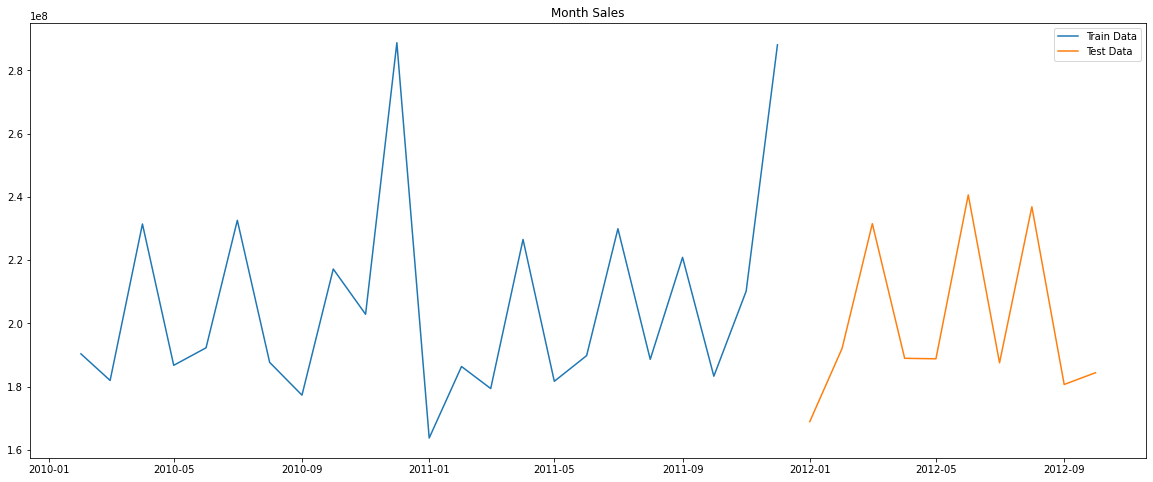

In [60]:
# Plot of Weekly_Sales with respect to years in train and test.
fig = plt.figure(figsize=(20,8))
plt.plot(train_data, label='Train Data')
plt.plot(test_data,label='Test Data')
plt.title('Month Sales')
plt.legend()
plt.show()

Analyzing the monthly sales, it is possible to tell the data has some tendency, at the beginning and ending of the year. 
To validate this hypotesis we are going to use the statsmodels library, which has builtin variety of methods to analyze trend, seasonal, for mean and standart deviation

In [66]:
# Decomposition of time series data. It is necessary to see whether the trend, seasonality and residual are present in data or not.
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_sells_agg['Weekly_Sales'], model='additive')

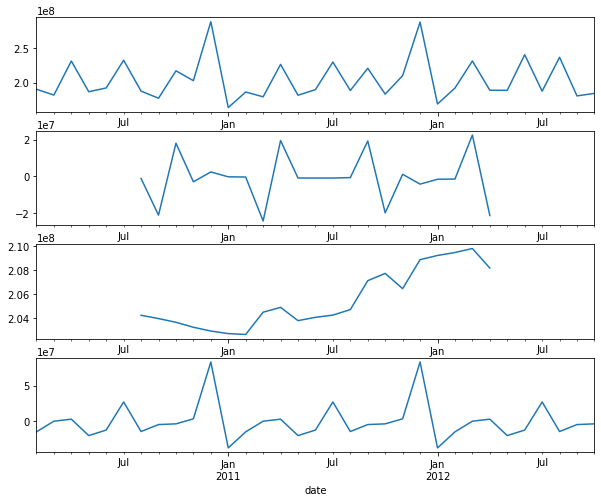

In [79]:
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(10,8))
result.observed.plot(ax=axes[0])
result.seasonal.plot(ax=axes[3])
result.trend.plot(ax=axes[2])
result.resid.plot(ax=axes[1])
plt.show()

For the result above is may clear that the data has increasing tendency, also seasonal behavior at January and December

The basic and most used test to verify if a dataset has tendency based on its standart deviation is the Dicky-Fuller test. 
 his is a test that tests the null hypothesis that a unit root is present in time series data.  Hence, this test is checking for stationarity or non-stationary data. The test is trying to reject the null hypothesis that a unit root exists and the data is non-stationary. If the null hypothesis is rejected, then the alternate can be considered valid (e.g., the data is stationary). 
 
The common approach is to select 95% of confidence, thus if the p-value is higher than 5% the Ho is rejected.

In [80]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_sells_agg['Weekly_Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -6.164462644675377
p-value: 7.044707818393715e-08
Critical Values:
	1%: -3.661428725118324
	5%: -2.960525341210433
	10%: -2.6193188033298647


The test output showed us that the p-value is lower than the 5%, this means the Ho is accepted, the data does no have tendency/ the data is stationary

### SearchGrid hyper params 

Here wer are going to perform searchgrid process to get the best hyper params for the sarima models. Notice, different metrics are used. AIC which describe the best interaction of hyperparams. RMSE to compute the accuracy of the models. Finally, MAPE which gives the percentange error of the models.

The mentioned process is performed using an iterative approach, hence the output of the first model is used as the input of the next one, until the maximun months to predict

In [120]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
from sklearn.metrics import mean_squared_error
import itertools
import statsmodels.api as sm

In [83]:
def search_grid_parameters(month=12):
    """Generate the parameters for the search grid 
    """
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], month) for x in list(itertools.product(p, d, q))]
    trend_lst = ['n','c','t','ct']
    return pdq, seasonal_pdq,trend_lst

In [95]:
def search_grid_walkforward(df_train,df_test,pdq,seasonal_pdq,trend_lst):
    """search grid process for sarima models using the WalkForward method (itarative)
    Args:
        df_train(pandas.DataFrame):
    """
    lst_result = []    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            for ind,trn in enumerate(trend_lst):

                df_train_copy = pd.DataFrame()
                df_train_copy = df_train.copy()
                temp_predict = pd.DataFrame()
                for i, date in enumerate(df_test.index): 
                    
                    mod = sm.tsa.statespace.SARIMAX(df_train_copy,
                                                    order=param,
                                                    seasonal_order=param_seasonal,
                                                    enforce_stationarity=False,
                                                    enforce_invertibility=False,
                                                    trend=trn)
                    #print(date)
                    try: 
                        results = mod.fit()
                    except:
                        break
                    if results.aic<450.0:
                        if results.mle_retvals['converged']:                               
                            pred = results.get_prediction(start=date,end=df_test.index.max(),dynamic=False)

                            yhat = pred.predicted_mean
                            temp_update = pd.DataFrame(yhat)
                            temp_update.columns =['Weekly_Sales']
                            df_train_copy = df_train_copy.append(temp_update.iloc[0])

                            temp_predict_update = pd.DataFrame(df_train_copy.tail(1))
                            temp_predict_update.columns =['Forecast']
                            temp_predict = temp_predict.append(temp_predict_update)
                        else:
                            print('model did not converged')
                            break      
                    else:
                        print('aic > 450')
                        break 

                if len(temp_predict)!=len(df_test):
                    break
                else:                    
                    y_truth = df_test                    
                    mse = ((y_truth.values - temp_predict.values)**2)
                    rmse = np.sqrt((mse.sum())/len(y_truth))
                    rmse = np.round(rmse,2)
                    e = (np.abs((y_truth.values - temp_predict.values))/y_truth.values).sum()
                    MAPE = np.round((e/len(y_truth))*100,2)

                    
                    print('ARIMA{}x{}12 - AIC:{} - TREND:{} - RMSE:{} - MAPE:{}'.format(param, 
                                                                                      param_seasonal, 
                                                                                      results.aic,trn,
                                                                                     rmse,MAPE))
                    if MAPE <25.0:
                        print("converged")
                        temp_dic = {'p':param[0],
                                    'q':param[1],
                                    'd':param[2],
                                    'P':param_seasonal[0],
                                    'Q':param_seasonal[1],
                                    'D':param_seasonal[2],
                                    'TREND':trn,
                                   'AIC':np.round(results.aic,2),'RMSE':np.round(rmse,2),
                                    'MAPE':np.round(MAPE,2)}
                        lst_result.append(temp_dic)
                        print()

    df_results = pd.DataFrame(lst_result)
    #df_results.sort_values(by='RMSE',inplace=True)
    return df_results

In [91]:
def train_sarima_model_WF(train_df,df_params,n=5,frq=12):
    """Train and create the sarima models using the paremeters found in the searchgrid process

    Using paremeters found in the searchgrid process train the 5th best sarima models

    Args: 
        train_df(pandas.DataFrame): data DataFrame within the sells with the initial format.
        Data Used for the searchgrid process
        df_params (pandas.DataFrame): data DataFrame within the paramertes for the sarima models. 
        Those were found in the searchgrid process 
        n(int): number of models to consider. This is used to extract the hyper parameters from 
        the DataFrame that holds it.
        frq(int): number of months to consider as one observation for the training process. 

    Output:
        list: list with the models trained using the hyper parameter found in the search grid process  
    """  
    lst_results=[]
    for i in range(n):
        temp_param = df_params.iloc[i,0:7]
        temp_pdq = (temp_param.values[0],temp_param.values[1],temp_param.values[2])
        temp_s_pdq = (temp_param.values[3],temp_param.values[4],temp_param.values[5],frq)
        trnd = temp_param[6]
        
        mod = sm.tsa.statespace.SARIMAX(train_df,
                                order=temp_pdq,
                                seasonal_order=temp_s_pdq,
                                enforce_stationarity=False,
                                enforce_invertibility=False,
                                    trend=trnd)
        res = mod.fit()
        print("converged: ",res.mle_retvals['converged']) 
        lst_results.append(res)
    return lst_results

In [96]:
pdq, seasonal_pdq, trent_lst = search_grid_parameters()
sarima_result_params = search_grid_walkforward(train_data, test_data, pdq, seasonal_pdq, trent_lst)

/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:275.82760986156666 - TREND:n - RMSE:201523489.64 - MAPE:100.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:260.4504052014754 - TREND:c - RMSE:25315296.78 - MAPE:12.14
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:276.2753631513472 - TREND:t - RMSE:169985263.35 - MAPE:84.67


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:262.1117305635139 - TREND:ct - RMSE:32667782.31 - MAPE:16.04
converged

aic > 450
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:245.44143241241153 - TREND:n - RMSE:35459006.16 - MAPE:13.92
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:247.78123109646546 - TREND:c - RMSE:35517692.17 - MAPE:14.0
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:247.82650182358375 - TREND:t - RMSE:35595459.01 - MAPE:13.77
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:250.93719186442365 - TREND:ct - RMSE:43623389.9 - MAPE:17.82
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0 - TREND:n - RMSE:35459006.16 - MAPE:13.92
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:8.0 - TREND:c - RMSE:35517692.17 - MAPE:14.0
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:8.0 - TREND:t - RMSE:35500469.74 - MAPE:14.05
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:ct - RMSE:78627848.16 - MAPE:31.36
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:277.82760986156666 - TREND:n - RMSE:201523489.64 - MAPE:100.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:262.4504052014754 - TREND:c - RMSE:25315296.67 - MAPE:12.14
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:278.2738456932153 - TREND:t - RMSE:170340398.21 - MAPE:84.82


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:264.1101434396771 - TREND:ct - RMSE:32836723.6 - MAPE:16.11
converged

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:247.44143241241153 - TREND:n - RMSE:35459006.16 - MAPE:13.92
converged

ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:249.78123109646546 - TREND:c - RMSE:35517692.17 - MAPE:14.0
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:249.83257912888195 - TREND:t - RMSE:35689376.55 - MAPE:13.82
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:252.49231763884944 - TREND:ct - RMSE:42010431.26 - MAPE:17.67
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0 - TREND:n - RMSE:35459006.16 - MAPE:13.92
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:10.0 - TREND:c - RMSE:35517692.17 - MAPE:14.0
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:10.0 - TREND:t - RMSE:35500469.74 - MAPE:14.05
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:ct - RMSE:78627848.16 - MAPE:31.36
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:316.6132349755593 - TREND:n - RMSE:201523489.64 - MAPE:100.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:298.51474880168615 - TREND:c - RMSE:25315296.48 - MAPE:12.14
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:316.59353887096364 - TREND:t - RMSE:171816129.24 - MAPE:85.52


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:300.1255911530235 - TREND:ct - RMSE:32913340.76 - MAPE:16.14
converged

ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:279.82760986156666 - TREND:n - RMSE:201523489.64 - MAPE:100.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:264.4504052014754 - TREND:c - RMSE:25315296.67 - MAPE:12.14
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:280.2739540127069 - TREND:t - RMSE:170359220.99 - MAPE:84.83


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:266.1101554618964 - TREND:ct - RMSE:32839985.51 - MAPE:16.12
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:6.0 - TREND:n - RMSE:35459006.16 - MAPE:13.92
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:8.0 - TREND:c - RMSE:35517692.17 - MAPE:14.0
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:8.0 - TREND:t - RMSE:35500469.74 - MAPE:14.05
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:ct - RMSE:78627848.16 - MAPE:31.36


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:8.0 - TREND:n - RMSE:35459006.16 - MAPE:13.92
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:10.0 - TREND:c - RMSE:35517692.17 - MAPE:14.0
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:10.0 - TREND:t - RMSE:35500469.74 - MAPE:14.05
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:ct - RMSE:78627848.16 - MAPE:31.36


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:35459006.16 - MAPE:13.92
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:35517692.17 - MAPE:14.0
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:35500469.74 - MAPE:14.05
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:78627848.16 - MAPE:31.36
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:246.48085585775118 - TREND:n - RMSE:275315555.32 - MAPE:134.35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:226.6199959508672 - TREND:c - RMSE:24026105.43 - MAPE:11.64
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:239.08312527593486 - TREND:t - RMSE:245469345.79 - MAPE:122.46


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:228.3979264602589 - TREND:ct - RMSE:37255076.99 - MAPE:17.48
converged

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:212.29414852232105 - TREND:n - RMSE:35668013.64 - MAPE:14.34
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:214.14706227118 - TREND:c - RMSE:35642550.66 - MAPE:14.33
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:224.1603127028781 - TREND:t - RMSE:92378005.71 - MAPE:41.6


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:279.3747048316144 - TREND:ct - RMSE:8440897026.41 - MAPE:3549.92


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:8.0 - TREND:n - RMSE:35667599.05 - MAPE:14.34
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:c - RMSE:35658567.67 - MAPE:14.35
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:t - RMSE:178114241.5 - MAPE:74.68


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:ct - RMSE:1.3199619438167491e+126 - MAPE:2.3106973184778154e+119


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:248.48801632621414 - TREND:n - RMSE:277341277.19 - MAPE:135.59


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:228.62003808761125 - TREND:c - RMSE:24027997.05 - MAPE:11.63
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:241.07384869544262 - TREND:t - RMSE:244254270.09 - MAPE:121.93


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:230.3863339010406 - TREND:ct - RMSE:36739695.87 - MAPE:17.35
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:281.1130873749504 - TREND:n - RMSE:35748941.44 - MAPE:14.36
converged

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:214.294145684716 - TREND:n - RMSE:35667849.07 - MAPE:14.34
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:216.14500921962087 - TREND:c - RMSE:35665782.92 - MAPE:14.34
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:226.01042641535057 - TREND:t - RMSE:92036810.93 - MAPE:41.64
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:35667599.05 - MAPE:14.34
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:35658567.67 - MAPE:14.35
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:178114241.5 - MAPE:74.68


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:1.3199619438167491e+126 - MAPE:2.3106973184778154e+119


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:329.3541776906707 - TREND:n - RMSE:515076503.47 - MAPE:249.39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:322.1453366567457 - TREND:c - RMSE:238127275.85 - MAPE:64.02


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:339.33417273947 - TREND:t - RMSE:765322094.55 - MAPE:250.85


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:325.07318123678016 - TREND:ct - RMSE:268778950.67 - MAPE:74.62


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:327.83705487693635 - TREND:n - RMSE:263004127.7 - MAPE:126.45


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:300.82678692047915 - TREND:c - RMSE:24073902.86 - MAPE:11.68
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:317.3344571299665 - TREND:t - RMSE:234724807.91 - MAPE:117.46


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:302.51572409808847 - TREND:ct - RMSE:36756618.2 - MAPE:17.36
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:250.4911150281693 - TREND:n - RMSE:278364338.62 - MAPE:136.21


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:230.62003805631375 - TREND:c - RMSE:24028013.5 - MAPE:11.63
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:243.0728647019871 - TREND:t - RMSE:244057611.9 - MAPE:121.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:232.3864009742507 - TREND:ct - RMSE:36746093.06 - MAPE:17.35
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:8.0 - TREND:n - RMSE:35667599.05 - MAPE:14.34
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:c - RMSE:35658567.67 - MAPE:14.35
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:t - RMSE:178114241.5 - MAPE:74.68


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:10.0 - TREND:n - RMSE:35667599.05 - MAPE:14.34
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:c - RMSE:35658567.67 - MAPE:14.35
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:t - RMSE:178114241.5 - MAPE:74.68


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:35667599.05 - MAPE:14.34
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:35658567.67 - MAPE:14.35
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:178114241.5 - MAPE:74.68


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.3199619438167491e+126 - MAPE:2.3106973184778154e+119


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:310.8853612761526 - TREND:n - RMSE:8647471578647.35 - MAPE:2231910.24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:192.5008226923362 - TREND:c - RMSE:22362733.95 - MAPE:10.23
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:204.37537252381117 - TREND:t - RMSE:395103084.97 - MAPE:198.25


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:194.77341221154256 - TREND:ct - RMSE:58439168.88 - MAPE:27.64
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:9.468949364829983e+26 - MAPE:1.7225766770678527e+20


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:170175404216.97 - MAPE:70845.89


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:1.7534787233218222e+25 - MAPE:2.931731720662686e+18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:1.7227225578038035e+41 - MAPE:3.703885419612464e+34


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:313.5970452671094 - TREND:n - RMSE:8647532766955.2 - MAPE:2237405.56


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:194.50108159143034 - TREND:c - RMSE:22504068.47 - MAPE:10.32
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:206.32063533884423 - TREND:t - RMSE:393389862.24 - MAPE:197.48


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:196.68622091629624 - TREND:ct - RMSE:57065800.3 - MAPE:27.12
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:9.468949364829983e+26 - MAPE:1.7225766770678527e+20


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:170175404216.97 - MAPE:70845.89


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:1.7534787233218222e+25 - MAPE:2.931731720662686e+18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.7227225578038035e+41 - MAPE:3.703885419612464e+34


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:314.88540187625705 - TREND:n - RMSE:8647471988390.56 - MAPE:2231946.68


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:196.5011070157812 - TREND:c - RMSE:22503665.4 - MAPE:10.32
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:208.31631268770556 - TREND:t - RMSE:392885283.67 - MAPE:197.25


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:198.68763149353015 - TREND:ct - RMSE:57072765.5 - MAPE:27.12


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:n - RMSE:9.468949364829983e+26 - MAPE:1.7225766770678527e+20


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:c - RMSE:170175404216.96 - MAPE:70845.89


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:t - RMSE:1.7534787233218222e+25 - MAPE:2.931731720662686e+18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:ct - RMSE:1.7227225578038035e+41 - MAPE:3.703885419612464e+34


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:n - RMSE:9.468949364829983e+26 - MAPE:1.7225766770678527e+20


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:c - RMSE:170175404216.96 - MAPE:70845.89


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:t - RMSE:1.7534787233218222e+25 - MAPE:2.931731720662686e+18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.7227225578038035e+41 - MAPE:3.703885419612464e+34


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:9.468949364829983e+26 - MAPE:1.7225766770678527e+20


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:170175404216.97 - MAPE:70845.89


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:1.7534787233218222e+25 - MAPE:2.931731720662686e+18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:1.7227225578038035e+41 - MAPE:3.703885419612464e+34


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:226.78234386582741 - TREND:n - RMSE:91440462.07 - MAPE:46.08
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:229.14239062828034 - TREND:c - RMSE:115612187.79 - MAPE:58.39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:229.08153915322285 - TREND:t - RMSE:165608775.84 - MAPE:81.97
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:231.06281462585648 - TREND:ct - RMSE:190319162.9 - MAPE:93.15


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:217.86288762434518 - TREND:n - RMSE:35562094.32 - MAPE:14.05
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:220.17032138658848 - TREND:c - RMSE:35491721.1 - MAPE:14.01
converged

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:220.17225421944173 - TREND:t - RMSE:35734990.35 - MAPE:14.29
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:224.14743563447428 - TREND:ct - RMSE:132619929.44 - MAPE:50.72


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:6.0 - TREND:n - RMSE:35562094.32 - MAPE:14.05
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:8.0 - TREND:c - RMSE:35491721.1 - MAPE:14.01
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:8.0 - TREND:t - RMSE:35719843.22 - MAPE:14.28
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:ct - RMSE:165414299.47 - MAPE:61.7
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:228.78234386582741 - TREND:n - RMSE:91440462.07 - MAPE:46.08
ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:231.14239062828034 - TREND:c - RMSE:115612187.79 - MAPE:58.39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:231.08153915322285 - TREND:t - RMSE:165608775.84 - MAPE:81.97


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:233.06281462585648 - TREND:ct - RMSE:190319162.9 - MAPE:93.15


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:219.86288762434518 - TREND:n - RMSE:35562094.32 - MAPE:14.05
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:222.17032138658848 - TREND:c - RMSE:35491721.1 - MAPE:14.01
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:222.17251227134122 - TREND:t - RMSE:35753311.28 - MAPE:14.31
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:224.39492439504852 - TREND:ct - RMSE:109582713.32 - MAPE:42.97


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:8.0 - TREND:n - RMSE:35562094.32 - MAPE:14.05
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:10.0 - TREND:c - RMSE:35491721.1 - MAPE:14.01
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:10.0 - TREND:t - RMSE:35719843.22 - MAPE:14.28
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:ct - RMSE:165414299.47 - MAPE:61.7
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:265.79480278746587 - TREND:n - RMSE:91440462.07 - MAPE:46.08


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:267.99945573299374 - TREND:c - RMSE:115612187.79 - MAPE:58.39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:267.9284623454267 - TREND:t - RMSE:165608775.84 - MAPE:81.97
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:269.9066170634992 - TREND:ct - RMSE:190319162.9 - MAPE:93.15
ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:230.78234386582741 - TREND:n - RMSE:91440462.07 - MAPE:46.08


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:233.14239062828034 - TREND:c - RMSE:115612187.79 - MAPE:58.39
ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:233.08153915322285 - TREND:t - RMSE:165608775.84 - MAPE:81.97


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:235.06281462585648 - TREND:ct - RMSE:190319162.9 - MAPE:93.15


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:6.0 - TREND:n - RMSE:35562094.32 - MAPE:14.05
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:8.0 - TREND:c - RMSE:35491721.1 - MAPE:14.01
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:8.0 - TREND:t - RMSE:35719843.22 - MAPE:14.28
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:ct - RMSE:165414299.47 - MAPE:61.7


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:8.0 - TREND:n - RMSE:35562094.32 - MAPE:14.05
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:10.0 - TREND:c - RMSE:35491721.1 - MAPE:14.01
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:10.0 - TREND:t - RMSE:35719843.22 - MAPE:14.28
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:ct - RMSE:165414299.47 - MAPE:61.7


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:35562094.32 - MAPE:14.05
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:35491721.1 - MAPE:14.01
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:35719843.22 - MAPE:14.28
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:165414299.47 - MAPE:61.7
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:190.14390624772432 - TREND:n - RMSE:26211705.74 - MAPE:12.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:192.22257484919285 - TREND:c - RMSE:97619443.17 - MAPE:47.83


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:193.7892086950165 - TREND:t - RMSE:315912941.04 - MAPE:147.57


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:196.13934070811666 - TREND:ct - RMSE:470359177.7 - MAPE:214.01
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:271.33352451982785 - TREND:n - RMSE:527704431484.78 - MAPE:249092.06


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:8.0 - TREND:n - RMSE:3.574234462499061e+19 - MAPE:15201542136509.67


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:c - RMSE:1.6847804660265824e+24 - MAPE:6.518367151172925e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:t - RMSE:17612588494912.4 - MAPE:6888405.32


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:ct - RMSE:1.907823713043776e+22 - MAPE:4671789802077659.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:192.14390788694828 - TREND:n - RMSE:26212105.26 - MAPE:12.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:194.22224769836257 - TREND:c - RMSE:97566161.82 - MAPE:47.94


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:195.75531842651415 - TREND:t - RMSE:316312282.59 - MAPE:147.68


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:198.12866923020323 - TREND:ct - RMSE:470817713.17 - MAPE:214.17
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:273.33352451982785 - TREND:n - RMSE:527704431484.78 - MAPE:249092.06


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:3.574234462499061e+19 - MAPE:15201542136509.67


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:1.6847804660265824e+24 - MAPE:6.518367151172925e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:17612588494912.4 - MAPE:6888405.32


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:1.907823713043776e+22 - MAPE:4671789802077659.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:263.066154337198 - TREND:n - RMSE:25086990.6 - MAPE:11.92
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:275.6290277186183 - TREND:c - RMSE:161054145.56 - MAPE:58.54


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:276.1835645912435 - TREND:t - RMSE:204945626.7 - MAPE:85.62


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:299.2790068479365 - TREND:ct - RMSE:744749701.59 - MAPE:219.11


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:265.04040903040027 - TREND:n - RMSE:25413502.59 - MAPE:12.19
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:267.09729219936145 - TREND:c - RMSE:95697287.23 - MAPE:47.11


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:269.12873917561274 - TREND:t - RMSE:299864470.69 - MAPE:141.12


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:271.55857365132454 - TREND:ct - RMSE:441000721.49 - MAPE:202.58


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:194.14389388941183 - TREND:n - RMSE:26209090.79 - MAPE:12.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:196.22041329683788 - TREND:c - RMSE:97337858.47 - MAPE:47.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:197.75847117136502 - TREND:t - RMSE:316343965.33 - MAPE:147.69


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:200.1345009827764 - TREND:ct - RMSE:471160350.81 - MAPE:214.3


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:8.0 - TREND:n - RMSE:3.574234462499061e+19 - MAPE:15201542136509.67


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:c - RMSE:1.6847804660265824e+24 - MAPE:6.518367151172925e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:t - RMSE:17612588494912.4 - MAPE:6888405.32


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:ct - RMSE:1.907823713043776e+22 - MAPE:4671789802077659.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:10.0 - TREND:n - RMSE:3.574234462499061e+19 - MAPE:15201542136509.67


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:c - RMSE:1.6847804660265824e+24 - MAPE:6.518367151172925e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:t - RMSE:17612588494912.4 - MAPE:6888405.32


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:ct - RMSE:1.907823713043776e+22 - MAPE:4671789802077659.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:3.574234462499061e+19 - MAPE:15201542136509.67


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:1.6847804660265824e+24 - MAPE:6.518367151172925e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:17612588494912.4 - MAPE:6888405.32


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.907823713043776e+22 - MAPE:4671789802077659.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:156.69699251029158 - TREND:n - RMSE:31915014.86 - MAPE:12.13
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:158.27051825261097 - TREND:c - RMSE:121564247.65 - MAPE:59.67


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:159.8018968723503 - TREND:t - RMSE:465211273.59 - MAPE:217.54


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:162.5261101958471 - TREND:ct - RMSE:785283033.62 - MAPE:359.68
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:61943190057.66 - MAPE:19148.71


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:3.4936017189901086e+39 - MAPE:1.2221842354878248e+33


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:1.3208642619116969e+85 - MAPE:4.2844384339664656e+78


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:1.015642076197745e+38 - MAPE:2.4859999446653134e+31


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:158.6989819989287 - TREND:n - RMSE:31922743.43 - MAPE:12.14
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:160.2623832125508 - TREND:c - RMSE:120835625.53 - MAPE:59.39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:161.78418158507222 - TREND:t - RMSE:449302481.18 - MAPE:211.85


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:164.55498756994507 - TREND:ct - RMSE:813579531.68 - MAPE:369.4


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:61943190057.66 - MAPE:19148.71


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:3.4936017189901086e+39 - MAPE:1.2221842354878248e+33


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:1.3208642619116969e+85 - MAPE:4.2844384339664656e+78


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.015642076197745e+38 - MAPE:2.4859999446653134e+31


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:269.5877311519746 - TREND:n - RMSE:49806054.6 - MAPE:20.17
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:269.93641673555794 - TREND:c - RMSE:118252931.03 - MAPE:58.27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:272.5486332390605 - TREND:t - RMSE:451411629.73 - MAPE:212.38


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:275.78571059501604 - TREND:ct - RMSE:785059057.57 - MAPE:359.18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:160.6997868470731 - TREND:n - RMSE:31944345.69 - MAPE:12.18
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:162.2677192301174 - TREND:c - RMSE:120928951.55 - MAPE:59.44


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:163.7932839238058 - TREND:t - RMSE:463747680.0 - MAPE:217.03


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:166.5688679073964 - TREND:ct - RMSE:815348792.71 - MAPE:370.03


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:n - RMSE:62479281242.16 - MAPE:19366.71


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:c - RMSE:8.302283004206782e+66 - MAPE:2.896648406332312e+60


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:t - RMSE:1.061071061117149e+31 - MAPE:1.777516257883747e+24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:ct - RMSE:2.570232891587915e+38 - MAPE:8.338267780846531e+31


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:n - RMSE:62479281242.16 - MAPE:19366.71


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:c - RMSE:8.302283004206782e+66 - MAPE:2.896648406332312e+60


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:t - RMSE:1.061071061117149e+31 - MAPE:1.777516257883747e+24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:ct - RMSE:2.570232891587915e+38 - MAPE:8.338267780846531e+31


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:61943190057.66 - MAPE:19148.71


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:3.4936017189901086e+39 - MAPE:1.2221842354878248e+33


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:1.3208642619116969e+85 - MAPE:4.2844384339664656e+78


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:1.015642076197745e+38 - MAPE:2.4859999446653134e+31


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:195.4662171486268 - TREND:n - RMSE:562632819.25 - MAPE:261.96
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:197.78525735760172 - TREND:c - RMSE:674671808.3 - MAPE:307.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:197.77042330841252 - TREND:t - RMSE:909271332.76 - MAPE:401.42


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:199.76573555713088 - TREND:ct - RMSE:1033677760.52 - MAPE:450.16
aic > 450
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:188.56788872705346 - TREND:n - RMSE:62815958.77 - MAPE:23.98
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:190.83746463856588 - TREND:c - RMSE:87700377.17 - MAPE:35.15
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:190.9488960293831 - TREND:t - RMSE:467039897.16 - MAPE:178.17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:194.76936941789725 - TREND:ct - RMSE:1476882985.29 - MAPE:531.39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:6.0 - TREND:n - RMSE:62815958.77 - MAPE:23.98
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:8.0 - TREND:c - RMSE:87700377.17 - MAPE:35.15


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:8.0 - TREND:t - RMSE:490081668.4 - MAPE:185.22


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:ct - RMSE:1807281956.52 - MAPE:625.41


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:197.4662171486268 - TREND:n - RMSE:562632819.25 - MAPE:261.96


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:199.78525735760172 - TREND:c - RMSE:674671808.3 - MAPE:307.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:199.77042412220777 - TREND:t - RMSE:909285400.58 - MAPE:401.42


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(1, 0, 2, 12)12 - AIC:201.7656349820575 - TREND:ct - RMSE:1033606641.66 - MAPE:450.14
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:253.9769918726973 - TREND:n - RMSE:2140929189.38 - MAPE:563.41


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:227.80495756630847 - TREND:c - RMSE:87700288.34 - MAPE:35.15
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:229.9208966440081 - TREND:t - RMSE:521727370.32 - MAPE:195.35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:280.2911126162892 - TREND:ct - RMSE:2151256235.87 - MAPE:725.32
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:190.56788872705346 - TREND:n - RMSE:62815958.77 - MAPE:23.98
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:192.83746463856588 - TREND:c - RMSE:87700377.17 - MAPE:35.15


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:192.89102601157708 - TREND:t - RMSE:453161591.86 - MAPE:174.2


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:195.68414565514175 - TREND:ct - RMSE:1431289268.73 - MAPE:518.78


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:8.0 - TREND:n - RMSE:62815958.77 - MAPE:23.98
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:10.0 - TREND:c - RMSE:87700377.17 - MAPE:35.15


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:10.0 - TREND:t - RMSE:490081668.4 - MAPE:185.22


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:ct - RMSE:1807281956.52 - MAPE:625.41
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:235.54995276823965 - TREND:n - RMSE:562632819.25 - MAPE:261.96


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:237.74230882912207 - TREND:c - RMSE:674671808.3 - MAPE:307.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:237.72452455337788 - TREND:t - RMSE:909452366.96 - MAPE:401.48


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:239.71874088288848 - TREND:ct - RMSE:1033086437.77 - MAPE:449.98
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:199.4662171486268 - TREND:n - RMSE:562632819.25 - MAPE:261.96


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:201.78525735760172 - TREND:c - RMSE:674671808.3 - MAPE:307.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:201.77042411109161 - TREND:t - RMSE:909285813.06 - MAPE:401.42


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:203.7656461965954 - TREND:ct - RMSE:1033603215.12 - MAPE:450.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:6.0 - TREND:n - RMSE:62815958.77 - MAPE:23.98
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:8.0 - TREND:c - RMSE:87700377.17 - MAPE:35.15


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:8.0 - TREND:t - RMSE:490081668.4 - MAPE:185.22


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:ct - RMSE:1807281956.52 - MAPE:625.41


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:8.0 - TREND:n - RMSE:62815958.77 - MAPE:23.98
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:10.0 - TREND:c - RMSE:87700377.17 - MAPE:35.15


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:10.0 - TREND:t - RMSE:490081668.4 - MAPE:185.22


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:ct - RMSE:1807281956.52 - MAPE:625.41


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:62815958.77 - MAPE:23.98
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:87700377.17 - MAPE:35.15


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:490081668.4 - MAPE:185.22


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:1807281956.52 - MAPE:625.41
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:192.54211714495744 - TREND:n - RMSE:142653956739.37 - MAPE:63498.24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:195.4452390943807 - TREND:c - RMSE:187240295107.06 - MAPE:81959.07


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:194.98476694707148 - TREND:t - RMSE:265877596061.97 - MAPE:111818.78


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:194.75054220736712 - TREND:ct - RMSE:259067550176.36 - MAPE:106597.45
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:8.0 - TREND:n - RMSE:8.667343366993294e+20 - MAPE:270712345390900.47


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:c - RMSE:7.33791687470009e+33 - MAPE:2.412543706362829e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:t - RMSE:84274159765640.84 - MAPE:29276588.17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:ct - RMSE:28125687360838.1 - MAPE:9299288.93


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(1, 0, 2, 12)12 - AIC:194.54211714495744 - TREND:n - RMSE:142653956739.37 - MAPE:63498.24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(1, 0, 2, 12)12 - AIC:197.44523910619947 - TREND:c - RMSE:187240287083.31 - MAPE:81959.06


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(1, 0, 2, 12)12 - AIC:196.9847678690284 - TREND:t - RMSE:265877777211.03 - MAPE:111818.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(1, 0, 2, 12)12 - AIC:196.75054673270995 - TREND:ct - RMSE:259068079143.56 - MAPE:106597.62
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(1, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:8.667343366993294e+20 - MAPE:270712345390900.47


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:7.33791687470009e+33 - MAPE:2.412543706362829e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:84274159765640.84 - MAPE:29276588.17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:28125687360838.1 - MAPE:9299288.93


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:284.81319553855076 - TREND:n - RMSE:142681195358.37 - MAPE:63508.6


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:288.3040092836324 - TREND:c - RMSE:180016062162.39 - MAPE:79288.93


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:291.32714432372245 - TREND:t - RMSE:233149436773.05 - MAPE:100023.13


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:298.52699010439653 - TREND:ct - RMSE:205742432133.3 - MAPE:87888.46
ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:286.8131757174362 - TREND:n - RMSE:142653956739.37 - MAPE:63498.24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:290.16783460530417 - TREND:c - RMSE:187251835297.92 - MAPE:81963.02


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:289.4693950887638 - TREND:t - RMSE:263962868412.08 - MAPE:111166.26


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:288.08960980072084 - TREND:ct - RMSE:253903308965.59 - MAPE:104870.09
ARIMA(0, 2, 1)x(2, 0, 2, 12)12 - AIC:196.54211714495744 - TREND:n - RMSE:142653956739.37 - MAPE:63498.24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 0, 2, 12)12 - AIC:199.44523911929636 - TREND:c - RMSE:187240279385.45 - MAPE:81959.06


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 0, 2, 12)12 - AIC:198.98476884695748 - TREND:t - RMSE:265877951672.51 - MAPE:111818.9


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 0, 2, 12)12 - AIC:198.75055163854586 - TREND:ct - RMSE:259068554068.24 - MAPE:106597.77


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:8.0 - TREND:n - RMSE:8.667343366993294e+20 - MAPE:270712345390900.47


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:c - RMSE:7.33791687470009e+33 - MAPE:2.412543706362829e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:t - RMSE:84274159765640.84 - MAPE:29276588.17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:ct - RMSE:5.087076397648612e+38 - MAPE:1.7996606556664002e+32


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:10.0 - TREND:n - RMSE:8.667343366993294e+20 - MAPE:270712345390900.47


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:c - RMSE:7.33791687470009e+33 - MAPE:2.412543706362829e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:t - RMSE:84274159765640.84 - MAPE:29276588.17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:ct - RMSE:5.087076397648612e+38 - MAPE:1.7996606556664002e+32


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:8.667343366993294e+20 - MAPE:270712345390900.47


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:7.33791687470009e+33 - MAPE:2.412543706362829e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:84274159765640.84 - MAPE:29276588.17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 1)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:28125687360838.1 - MAPE:9299288.93


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:121.29692895665542 - TREND:n - RMSE:78768631.08 - MAPE:38.11


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:124.04021606337969 - TREND:c - RMSE:739065000.52 - MAPE:317.82


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:125.03675305283261 - TREND:t - RMSE:2745282572.49 - MAPE:1120.55


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(0, 0, 2, 12)12 - AIC:127.40085897466255 - TREND:ct - RMSE:4293006362.56 - MAPE:1707.55


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:2.2459402894278028e+46 - MAPE:8.395738131858156e+39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:5.516329160952884e+43 - MAPE:1.7833784178438835e+37


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:1.3953921975142205e+25 - MAPE:2.4438969510841155e+18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:1.2576951064744724e+37 - MAPE:3.435468869341995e+30


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:123.29660692283976 - TREND:n - RMSE:78807296.15 - MAPE:38.13


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:126.03880516570453 - TREND:c - RMSE:738286647.47 - MAPE:317.58


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:127.05553593579609 - TREND:t - RMSE:2780988173.87 - MAPE:1130.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(1, 0, 2, 12)12 - AIC:129.44015077083725 - TREND:ct - RMSE:4393645289.17 - MAPE:1737.13


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:2.2459402894278028e+46 - MAPE:8.395738131858156e+39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:5.516329160952884e+43 - MAPE:1.7833784178438835e+37


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:1.3953921975142205e+25 - MAPE:2.4438969510841155e+18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.2576951064744724e+37 - MAPE:3.435468869341995e+30


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:234.59778824812287 - TREND:n - RMSE:82654195.99 - MAPE:39.75


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:237.9282104347874 - TREND:c - RMSE:716933789.54 - MAPE:309.52


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:239.99374498290803 - TREND:t - RMSE:2746618920.48 - MAPE:1120.15


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:242.54994438608216 - TREND:ct - RMSE:4236918801.18 - MAPE:1688.18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:125.29706083916963 - TREND:n - RMSE:78749807.27 - MAPE:38.1


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:128.03891204496705 - TREND:c - RMSE:738038242.48 - MAPE:317.51


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:129.0641052292468 - TREND:t - RMSE:2777035002.92 - MAPE:1129.83


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 0, 2, 12)12 - AIC:131.53035853518105 - TREND:ct - RMSE:4424969984.31 - MAPE:1746.5


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:n - RMSE:2.2459402894278028e+46 - MAPE:8.395738131858156e+39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:c - RMSE:8.178410654064439e+31 - MAPE:1.4027997397557765e+25


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:t - RMSE:1.41002832089103e+46 - MAPE:2.4185472203378395e+39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:ct - RMSE:3.538084879997336e+57 - MAPE:1.1579009696448968e+51


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:n - RMSE:2.2459402894278028e+46 - MAPE:8.395738131858156e+39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:c - RMSE:8.178410654064439e+31 - MAPE:1.4027997397557765e+25


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:t - RMSE:1.41002832089103e+46 - MAPE:2.4185472203378395e+39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:ct - RMSE:3.538084879997336e+57 - MAPE:1.1579009696448968e+51


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:2.2459402894278028e+46 - MAPE:8.395738131858156e+39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:5.516329160952884e+43 - MAPE:1.7833784178438835e+37


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:1.3953921975142205e+25 - MAPE:2.4438969510841155e+18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(0, 2, 2)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:1.2576951064744724e+37 - MAPE:3.435468869341995e+30


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:266.0593087184494 - TREND:n - RMSE:88369771.82 - MAPE:44.44


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:262.0577647174763 - TREND:c - RMSE:23649094.14 - MAPE:11.06
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:267.43616404705404 - TREND:t - RMSE:178758550.0 - MAPE:88.24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:263.7373868560546 - TREND:ct - RMSE:28726058.08 - MAPE:14.32
converged

aic > 450
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:245.99314543701087 - TREND:n - RMSE:35441407.73 - MAPE:13.91
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:247.99159632811626 - TREND:c - RMSE:35466841.76 - MAPE:13.94
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:248.1416117444648 - TREND:t - RMSE:35603326.09 - MAPE:13.64
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:253.30771958149836 - TREND:ct - RMSE:48143916.4 - MAPE:19.49
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:8.0 - TREND:n - RMSE:35441407.73 - MAPE:13.91
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:c - RMSE:35466841.76 - MAPE:13.94
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:t - RMSE:36180328.55 - MAPE:14.39
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:ct - RMSE:144972728.47 - MAPE:56.87
model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged
aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:268.0593087184494 - TREND:n - RMSE:88369771.85 - MAPE:44.44


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:264.0577647174763 - TREND:c - RMSE:23649094.16 - MAPE:11.06
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:269.43616404705404 - TREND:t - RMSE:178758550.02 - MAPE:88.24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:265.7373868560546 - TREND:ct - RMSE:28726058.09 - MAPE:14.32
converged

ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:246.00543120490897 - TREND:n - RMSE:35682518.22 - MAPE:14.1
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:248.0078498299695 - TREND:c - RMSE:35757899.27 - MAPE:14.17
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:254.80824311993467 - TREND:t - RMSE:47571368.8 - MAPE:18.02
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:281.3808555424725 - TREND:ct - RMSE:2630251664.43 - MAPE:804.01
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:247.99314543701087 - TREND:n - RMSE:35441407.73 - MAPE:13.91
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:249.99159632811626 - TREND:c - RMSE:35466841.76 - MAPE:13.94
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:250.17170344316574 - TREND:t - RMSE:35723739.98 - MAPE:13.69
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:255.11100139260668 - TREND:ct - RMSE:47599704.47 - MAPE:19.43
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:35441407.73 - MAPE:13.91
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:35466841.76 - MAPE:13.94
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:36180328.55 - MAPE:14.39
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:144972728.47 - MAPE:56.87
model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: Conver

model did not converged
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:268.2566277037428 - TREND:n - RMSE:109832438.97 - MAPE:53.47


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:313.05539778521364 - TREND:c - RMSE:4199918301.94 - MAPE:1115.15


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:304.7011549773378 - TREND:t - RMSE:1500661781.81 - MAPE:417.81


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:315.32557935641967 - TREND:ct - RMSE:4354456308.35 - MAPE:1161.59


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:268.0593087184494 - TREND:n - RMSE:88369771.85 - MAPE:44.44


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:264.05776471747635 - TREND:c - RMSE:23649094.14 - MAPE:11.06
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:269.43616404705404 - TREND:t - RMSE:178758550.03 - MAPE:88.24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:265.7373868560546 - TREND:ct - RMSE:28726058.13 - MAPE:14.32
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:270.0593087184494 - TREND:n - RMSE:88369771.88 - MAPE:44.44


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:266.0577647174763 - TREND:c - RMSE:23649094.14 - MAPE:11.06
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:271.43616404705404 - TREND:t - RMSE:178758550.04 - MAPE:88.24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:267.7373868560546 - TREND:ct - RMSE:28726058.14 - MAPE:14.32
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:8.0 - TREND:n - RMSE:35441407.73 - MAPE:13.91
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:c - RMSE:35466841.76 - MAPE:13.94
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:t - RMSE:36180328.55 - MAPE:14.39
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:ct - RMSE:144972728.47 - MAPE:56.87


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:10.0 - TREND:n - RMSE:35441407.73 - MAPE:13.91
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:c - RMSE:35466841.76 - MAPE:13.94
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:t - RMSE:36180328.55 - MAPE:14.39
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:ct - RMSE:144972728.47 - MAPE:56.87


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:35441407.73 - MAPE:13.91
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:35466841.76 - MAPE:13.94
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:36180328.55 - MAPE:14.39
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 0)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:144972728.47 - MAPE:56.87
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:228.733129377273 - TREND:n - RMSE:32686965.14 - MAPE:15.86
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:228.1289096511413 - TREND:c - RMSE:26215889.19 - MAPE:11.82
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:230.85732659775817 - TREND:t - RMSE:205164141.79 - MAPE:98.71


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:229.86703178253157 - TREND:ct - RMSE:31688525.23 - MAPE:15.34
converged

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:213.7598914109418 - TREND:n - RMSE:35470262.11 - MAPE:13.95
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:215.62344020842116 - TREND:c - RMSE:35236689.57 - MAPE:13.68
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:222.9828873577939 - TREND:t - RMSE:67065643.03 - MAPE:29.89


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:300.5306027194086 - TREND:ct - RMSE:4360065449211150.5 - MAPE:838366054.95


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:35470262.23 - MAPE:13.95
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:35302911.12 - MAPE:13.73
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:355304256.07 - MAPE:126.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:4.212241584222234e+27 - MAPE:7.233569396965955e+20


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:230.73312729835914 - TREND:n - RMSE:32687740.96 - MAPE:15.86
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:230.1288903729453 - TREND:c - RMSE:26217866.75 - MAPE:11.82
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:232.8576406218622 - TREND:t - RMSE:205181765.75 - MAPE:98.72


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:231.86718980103802 - TREND:ct - RMSE:31729131.18 - MAPE:15.36
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:249.94669553246536 - TREND:n - RMSE:35791738.98 - MAPE:13.97
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:261.18168484358944 - TREND:c - RMSE:56647996.76 - MAPE:22.84
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:215.7598914109418 - TREND:n - RMSE:35470262.1 - MAPE:13.95
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:217.62331884064716 - TREND:c - RMSE:35217129.67 - MAPE:13.68
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:224.99094035508693 - TREND:t - RMSE:67158176.66 - MAPE:29.92


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:306.01869236293817 - TREND:ct - RMSE:4297839946044541.0 - MAPE:826666836.02


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:35470262.23 - MAPE:13.95
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:35302911.12 - MAPE:13.73
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:355304256.07 - MAPE:126.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:4.212241584222234e+27 - MAPE:7.233569396965955e+20


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:267.208518977839 - TREND:n - RMSE:39740906.61 - MAPE:18.21
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:266.16063620876116 - TREND:c - RMSE:26044844.97 - MAPE:11.6
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:269.29123168566696 - TREND:t - RMSE:201888639.02 - MAPE:97.31


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:267.83987939222555 - TREND:ct - RMSE:30771703.77 - MAPE:15.0
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:232.73355131637553 - TREND:n - RMSE:32570700.7 - MAPE:15.82
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:232.12888847184354 - TREND:c - RMSE:26218044.47 - MAPE:11.82
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:234.85873261843744 - TREND:t - RMSE:205289117.8 - MAPE:98.76


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:233.8672487750472 - TREND:ct - RMSE:31735582.21 - MAPE:15.36
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:n - RMSE:35470262.23 - MAPE:13.95
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:c - RMSE:35302911.12 - MAPE:13.73
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:t - RMSE:355304256.02 - MAPE:126.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:ct - RMSE:4.211580066043835e+27 - MAPE:7.232433657661378e+20


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:n - RMSE:35470262.23 - MAPE:13.95
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:c - RMSE:35302911.12 - MAPE:13.73
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:t - RMSE:355304256.02 - MAPE:126.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:ct - RMSE:4.211580066043835e+27 - MAPE:7.232433657661378e+20


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:35470262.23 - MAPE:13.95
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:35302911.12 - MAPE:13.73
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:355304256.07 - MAPE:126.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:4.212241584222234e+27 - MAPE:7.233569396965955e+20


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:213.82290568049748 - TREND:n - RMSE:727420928.89 - MAPE:280.92


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:194.33645948707414 - TREND:c - RMSE:22104166.59 - MAPE:10.06
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:197.76238754834486 - TREND:t - RMSE:334543142.37 - MAPE:158.45


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:196.5506503898542 - TREND:ct - RMSE:52977408.55 - MAPE:24.51
converged

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:1.6596995111643072e+39 - MAPE:2.8471500986054318e+32


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:3253809625706.01 - MAPE:747195.9


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:5.553960316107525e+37 - MAPE:9.5307865941817e+30


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:3.263078881032939e+97 - MAPE:5.596987124682886e+90


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:215.81174492344735 - TREND:n - RMSE:727267110.82 - MAPE:280.49


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:196.33637099392908 - TREND:c - RMSE:22177036.39 - MAPE:10.1
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:199.76228490024573 - TREND:t - RMSE:334412993.53 - MAPE:158.4


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:198.5511536597115 - TREND:ct - RMSE:53256856.48 - MAPE:24.65
converged

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:1.6596995111643072e+39 - MAPE:2.8471500986054318e+32


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:3253809625706.01 - MAPE:747195.9


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:5.553960316107525e+37 - MAPE:9.5307865941817e+30


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:3.263078881032939e+97 - MAPE:5.596987124682886e+90


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:217.80075207754442 - TREND:n - RMSE:727882939.01 - MAPE:280.66


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:198.33637689482447 - TREND:c - RMSE:22176501.76 - MAPE:10.1
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:201.76234513564287 - TREND:t - RMSE:334487539.29 - MAPE:158.43


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:200.54926421491237 - TREND:ct - RMSE:53289517.23 - MAPE:24.66
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:n - RMSE:1.6596995111643072e+39 - MAPE:2.8471500986054318e+32


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:c - RMSE:3253809625651.36 - MAPE:747195.9


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:t - RMSE:5.553960316107525e+37 - MAPE:9.5307865941817e+30


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:16.0 - TREND:ct - RMSE:3.263078881032939e+97 - MAPE:5.596987124682886e+90


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:n - RMSE:1.6596995111643072e+39 - MAPE:2.8471500986054318e+32


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:c - RMSE:3253809625651.36 - MAPE:747195.9


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:t - RMSE:5.553960316107525e+37 - MAPE:9.5307865941817e+30


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:18.0 - TREND:ct - RMSE:3.263078881032939e+97 - MAPE:5.596987124682886e+90


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:n - RMSE:1.6596995111643072e+39 - MAPE:2.8471500986054318e+32


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:c - RMSE:3253809625706.01 - MAPE:747195.9


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:t - RMSE:5.553960316107525e+37 - MAPE:9.5307865941817e+30


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:20.0 - TREND:ct - RMSE:3.263078881032939e+97 - MAPE:5.596987124682886e+90


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:227.321806018483 - TREND:n - RMSE:63375934.21 - MAPE:31.05
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:229.21048400148834 - TREND:c - RMSE:83529808.51 - MAPE:41.53


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:229.13866196111232 - TREND:t - RMSE:121211428.24 - MAPE:59.48


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:231.1317948251212 - TREND:ct - RMSE:132052699.28 - MAPE:64.44
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:216.50342123744252 - TREND:n - RMSE:35068764.86 - MAPE:13.48
converged

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:218.49045722467423 - TREND:c - RMSE:35372179.87 - MAPE:13.85
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:218.7062605824193 - TREND:t - RMSE:50518204.08 - MAPE:19.74
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:220.96043302438596 - TREND:ct - RMSE:37014979.42 - MAPE:14.61
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:8.0 - TREND:n - RMSE:35068764.86 - MAPE:13.48
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:c - RMSE:35372179.87 - MAPE:13.85
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:t - RMSE:58538774.54 - MAPE:22.98
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:ct - RMSE:36312493.78 - MAPE:14.25
converged

model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarni

model did not converged
aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:229.321806018483 - TREND:n - RMSE:63375934.21 - MAPE:31.05


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:231.21048400148834 - TREND:c - RMSE:83529808.51 - MAPE:41.53


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:231.1383723945439 - TREND:t - RMSE:121143399.36 - MAPE:59.45


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:233.1314369529337 - TREND:ct - RMSE:131981114.94 - MAPE:64.41
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:221.99450670251224 - TREND:n - RMSE:54832428.95 - MAPE:21.1
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:224.7921985772537 - TREND:c - RMSE:64233789.13 - MAPE:24.09
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:227.93453240212 - TREND:t - RMSE:128992316.57 - MAPE:40.29


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:226.2926068711041 - TREND:ct - RMSE:40594893.9 - MAPE:15.26
converged

ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:218.50342123744252 - TREND:n - RMSE:35068764.86 - MAPE:13.48
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:220.49045722467423 - TREND:c - RMSE:35372179.87 - MAPE:13.85
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:220.58286939944708 - TREND:t - RMSE:48002526.84 - MAPE:19.43
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:222.8530372313299 - TREND:ct - RMSE:39030988.38 - MAPE:14.73
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:35068764.86 - MAPE:13.48
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:35372179.87 - MAPE:13.85
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:58538774.54 - MAPE:22.98
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:36312493.78 - MAPE:14.25
converged

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:229.8517669060047 - TREND:n - RMSE:96820812.07 - MAPE:44.73


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:231.97796486002716 - TREND:c - RMSE:104777258.04 - MAPE:47.62


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:233.2013589815087 - TREND:t - RMSE:115911219.2 - MAPE:53.04


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:235.68905526372774 - TREND:ct - RMSE:110794763.85 - MAPE:52.57
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:229.321806018483 - TREND:n - RMSE:63375934.21 - MAPE:31.05


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:231.21048400148834 - TREND:c - RMSE:83529808.51 - MAPE:41.53


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:231.13838338308648 - TREND:t - RMSE:121137978.88 - MAPE:59.45


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:233.1314122249018 - TREND:ct - RMSE:131951260.08 - MAPE:64.4
ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:231.321806018483 - TREND:n - RMSE:63375934.21 - MAPE:31.05


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:233.21048400148834 - TREND:c - RMSE:83529808.51 - MAPE:41.53


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:233.1383924603501 - TREND:t - RMSE:121147231.31 - MAPE:59.45


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:235.1314937371219 - TREND:ct - RMSE:131982159.14 - MAPE:64.41


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:8.0 - TREND:n - RMSE:35068764.86 - MAPE:13.48
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:c - RMSE:35372179.87 - MAPE:13.85
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:t - RMSE:58538774.54 - MAPE:22.98
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:ct - RMSE:36312493.78 - MAPE:14.25
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:10.0 - TREND:n - RMSE:35068764.86 - MAPE:13.48
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:c - RMSE:35372179.87 - MAPE:13.85
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:t - RMSE:58538774.54 - MAPE:22.98
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:ct - RMSE:36312493.78 - MAPE:14.25
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:35068764.86 - MAPE:13.48
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:35372179.87 - MAPE:13.85
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:58538774.54 - MAPE:22.98
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:36312493.78 - MAPE:14.25
converged

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarni

model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


aic > 450
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:192.01417067473707 - TREND:n - RMSE:28602789.33 - MAPE:14.45
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:193.9356798135025 - TREND:c - RMSE:76776401.51 - MAPE:37.33


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:195.0466756332931 - TREND:t - RMSE:244013989.38 - MAPE:114.71


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:197.3195892272446 - TREND:ct - RMSE:343665769.28 - MAPE:159.17
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:189.03058199046126 - TREND:n - RMSE:92505604.1 - MAPE:39.42


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:196.55820172146036 - TREND:c - RMSE:434969987.64 - MAPE:208.45


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:192.67063083359074 - TREND:t - RMSE:435381348.91 - MAPE:184.42


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:93115061.6 - MAPE:39.83


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:434236974.89 - MAPE:208.16


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:837680399.93 - MAPE:304.25


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:2.8224509118943797e+34 - MAPE:4.8472416207373286e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:194.01417031297532 - TREND:n - RMSE:28602715.15 - MAPE:14.45
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:195.93628888247315 - TREND:c - RMSE:76828336.57 - MAPE:37.35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:197.05250625383707 - TREND:t - RMSE:244394612.5 - MAPE:114.85


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:199.32284911222484 - TREND:ct - RMSE:343921784.28 - MAPE:159.27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:243.0234032064414 - TREND:n - RMSE:249176581.81 - MAPE:90.07


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:191.03058642224508 - TREND:n - RMSE:92506424.63 - MAPE:39.42


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:198.5582001794878 - TREND:c - RMSE:434970870.21 - MAPE:208.45


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:194.92457426475556 - TREND:t - RMSE:433136827.86 - MAPE:183.59


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:93115061.6 - MAPE:39.83


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:434236974.89 - MAPE:208.16


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:837680399.93 - MAPE:304.25


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:2.8224509118943797e+34 - MAPE:4.8472416207373286e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:236.29352955568112 - TREND:n - RMSE:116709347.78 - MAPE:38.17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:230.41575652812816 - TREND:n - RMSE:28313695.59 - MAPE:14.31
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:232.31865344273513 - TREND:c - RMSE:76509533.83 - MAPE:37.22


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:233.6478564221288 - TREND:t - RMSE:242351247.78 - MAPE:114.06


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:235.9806542837364 - TREND:ct - RMSE:342511100.49 - MAPE:158.73


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:196.01416503010435 - TREND:n - RMSE:28601809.41 - MAPE:14.45
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:197.93139937401497 - TREND:c - RMSE:76672892.46 - MAPE:37.29


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:199.05037526811853 - TREND:t - RMSE:244383080.63 - MAPE:114.85


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:201.32540489970637 - TREND:ct - RMSE:344178732.9 - MAPE:159.37


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:n - RMSE:93115061.61 - MAPE:39.83


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:c - RMSE:434236974.89 - MAPE:208.16


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:t - RMSE:837680399.84 - MAPE:304.25


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:ct - RMSE:2.8224509118943797e+34 - MAPE:4.8472416207373286e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:n - RMSE:93115061.61 - MAPE:39.83


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:c - RMSE:434236974.89 - MAPE:208.16


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:t - RMSE:837680399.84 - MAPE:304.25


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:ct - RMSE:2.8224509118943797e+34 - MAPE:4.8472416207373286e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:93115061.6 - MAPE:39.83


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:434236974.89 - MAPE:208.16


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:837680399.93 - MAPE:304.25


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:2.8224509118943797e+34 - MAPE:4.8472416207373286e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:190.38268013467984 - TREND:n - RMSE:82864028633.78 - MAPE:25369.25


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:159.65526420136825 - TREND:c - RMSE:78688777.91 - MAPE:38.39


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:2.6342409031563052e+25 - MAPE:4.5183745032907776e+18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:2.4507865743150045e+42 - MAPE:4.2044341384138365e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:2723383281956.77 - MAPE:744408.06


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.546126917477452e+124 - MAPE:2.660363189893546e+117


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:192.38264835909771 - TREND:n - RMSE:82862008306.63 - MAPE:25368.75


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:161.65548352259663 - TREND:c - RMSE:78744498.78 - MAPE:38.41


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:2.6342409031563052e+25 - MAPE:4.5183745032907776e+18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:2.4507865743150045e+42 - MAPE:4.2044341384138365e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:2723383281956.77 - MAPE:744408.06


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:1.546126917477452e+124 - MAPE:2.660363189893546e+117


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:251.1214817186876 - TREND:n - RMSE:429449690.47 - MAPE:189.64


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:244.2392533072586 - TREND:n - RMSE:308881266.17 - MAPE:142.8


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:234.47245466869535 - TREND:c - RMSE:76871974.89 - MAPE:37.59


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:194.38264344402512 - TREND:n - RMSE:82863774749.54 - MAPE:25369.22


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:163.65554534103612 - TREND:c - RMSE:78586618.43 - MAPE:38.35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:n - RMSE:2.6714134586512973e+25 - MAPE:4.58213462741967e+18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:c - RMSE:2.4507865743150045e+42 - MAPE:4.2044341384138365e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:t - RMSE:2723383274595.21 - MAPE:744408.06


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.135298961680646e+31 - MAPE:1.9474442195838592e+24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:n - RMSE:2.6714134586512973e+25 - MAPE:4.58213462741967e+18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:c - RMSE:2.4507865743150045e+42 - MAPE:4.2044341384138365e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:t - RMSE:2723383274595.21 - MAPE:744408.06


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:18.0 - TREND:ct - RMSE:1.135298961680646e+31 - MAPE:1.9474442195838592e+24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:n - RMSE:2.6342409031563052e+25 - MAPE:4.5183745032907776e+18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:c - RMSE:2.4507865743150045e+42 - MAPE:4.2044341384138365e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:t - RMSE:2723383281956.77 - MAPE:744408.06


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:20.0 - TREND:ct - RMSE:1.546126917477452e+124 - MAPE:2.660363189893546e+117


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:194.28531889939123 - TREND:n - RMSE:423352586.58 - MAPE:198.47
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:196.2750434430577 - TREND:c - RMSE:469917070.14 - MAPE:217.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:196.19390154506266 - TREND:t - RMSE:733304972.47 - MAPE:324.48


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:198.08285223354633 - TREND:ct - RMSE:1053899360.06 - MAPE:451.06
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:186.26210701153167 - TREND:n - RMSE:100724653.9 - MAPE:43.27
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:188.2248721701841 - TREND:c - RMSE:156237986.48 - MAPE:66.74


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:191.8699169996841 - TREND:t - RMSE:1045602682.93 - MAPE:408.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:200.10633554010795 - TREND:ct - RMSE:4439640097.03 - MAPE:1619.93


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:8.0 - TREND:n - RMSE:100724653.9 - MAPE:43.27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:c - RMSE:156237986.48 - MAPE:66.74


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:t - RMSE:1345516570.55 - MAPE:500.78


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:ct - RMSE:7447383394.45 - MAPE:2475.01
model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged
aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:196.28531889939123 - TREND:n - RMSE:423352586.58 - MAPE:198.47
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:198.2750434430577 - TREND:c - RMSE:469917070.14 - MAPE:217.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:198.19377203775932 - TREND:t - RMSE:733199044.07 - MAPE:324.45


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:200.08179225356588 - TREND:ct - RMSE:1054339292.85 - MAPE:451.2
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:195.23485483421533 - TREND:n - RMSE:170494074.73 - MAPE:55.36


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:197.3947278861203 - TREND:c - RMSE:218082916.03 - MAPE:76.26


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:201.78915696242737 - TREND:t - RMSE:1174771571.13 - MAPE:452.11


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:208.62668106352373 - TREND:ct - RMSE:4129777684.91 - MAPE:1527.67
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:188.26210701153167 - TREND:n - RMSE:100724653.9 - MAPE:43.27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:190.2248721701841 - TREND:c - RMSE:156237986.48 - MAPE:66.74


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:193.86966168757917 - TREND:t - RMSE:1054447291.29 - MAPE:411.56


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:202.08492336616558 - TREND:ct - RMSE:4435041000.61 - MAPE:1618.37


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:100724653.9 - MAPE:43.27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:156237986.48 - MAPE:66.74


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:1345516570.55 - MAPE:500.78


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:7447383394.45 - MAPE:2475.01
model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarni

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:194.33039089945476 - TREND:n - RMSE:404231716.03 - MAPE:190.9


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:196.3943948719259 - TREND:c - RMSE:442475927.64 - MAPE:207.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:200.12352676068042 - TREND:t - RMSE:645623776.65 - MAPE:288.63


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:207.04634180242323 - TREND:ct - RMSE:862053736.81 - MAPE:375.35
ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:196.28531889939123 - TREND:n - RMSE:423352586.58 - MAPE:198.47


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:198.2750434430577 - TREND:c - RMSE:469917070.14 - MAPE:217.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:198.193804869935 - TREND:t - RMSE:733116233.7 - MAPE:324.43


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:200.08139859570494 - TREND:ct - RMSE:1053859246.24 - MAPE:451.04


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:198.28531889939123 - TREND:n - RMSE:423352586.58 - MAPE:198.47


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:200.2750434430577 - TREND:c - RMSE:469917070.14 - MAPE:217.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:200.19382088356303 - TREND:t - RMSE:733263143.71 - MAPE:324.47


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:202.08190288065322 - TREND:ct - RMSE:1054475872.75 - MAPE:451.24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:8.0 - TREND:n - RMSE:100724653.9 - MAPE:43.27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:c - RMSE:156237986.48 - MAPE:66.74


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:t - RMSE:1345516570.55 - MAPE:500.78


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:ct - RMSE:7447383394.45 - MAPE:2475.01


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:10.0 - TREND:n - RMSE:100724653.9 - MAPE:43.27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:c - RMSE:156237986.48 - MAPE:66.74


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:t - RMSE:1345516570.55 - MAPE:500.78


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:ct - RMSE:7447383394.45 - MAPE:2475.01


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:100724653.9 - MAPE:43.27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:156237986.48 - MAPE:66.74


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:1345516570.55 - MAPE:500.78


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:7447383394.45 - MAPE:2475.01
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:157.82535484956753 - TREND:n - RMSE:148107109.65 - MAPE:72.94


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:159.8985055786231 - TREND:c - RMSE:455338815.63 - MAPE:205.12


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:161.3707404508806 - TREND:t - RMSE:1555450776.69 - MAPE:641.18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:163.5759378014722 - TREND:ct - RMSE:2315301100.68 - MAPE:937.28
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:1.4253003882564365e+93 - MAPE:2.4533037593318563e+86


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:2.093513815417798e+34 - MAPE:3.599483779771382e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:7.803737901377663e+41 - MAPE:1.3390938093025756e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:1.0388529350448838e+33 - MAPE:1.787656809084967e+26


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:159.82535484956753 - TREND:n - RMSE:148107109.65 - MAPE:72.94


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:161.89789114129104 - TREND:c - RMSE:455192577.69 - MAPE:205.08


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:163.36998705413384 - TREND:t - RMSE:1555693419.38 - MAPE:641.25


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:165.574847248233 - TREND:ct - RMSE:2315172963.79 - MAPE:937.24
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:1.4253003882564365e+93 - MAPE:2.4533037593318563e+86


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:2.093513815417798e+34 - MAPE:3.599483779771382e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:7.803737901377663e+41 - MAPE:1.3390938093025756e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.0388529350448838e+33 - MAPE:1.787656809084967e+26


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:194.78227897541018 - TREND:n - RMSE:141377891.62 - MAPE:70.04


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:201.76406191633308 - TREND:c - RMSE:360426666.57 - MAPE:160.97


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:204.7393838370773 - TREND:t - RMSE:1375368363.18 - MAPE:558.35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:217.45248435511007 - TREND:ct - RMSE:2000340039.35 - MAPE:805.62


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:196.78169789156627 - TREND:n - RMSE:148099882.79 - MAPE:72.93


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:198.8601756482687 - TREND:c - RMSE:451607245.54 - MAPE:203.79


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:200.59724626990757 - TREND:t - RMSE:1529820427.69 - MAPE:632.74


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:202.8701125301851 - TREND:ct - RMSE:2284102400.6 - MAPE:927.15
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:161.82535484956753 - TREND:n - RMSE:148107109.65 - MAPE:72.94


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:163.89840200667982 - TREND:c - RMSE:455316497.44 - MAPE:205.12


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:165.37149381203812 - TREND:t - RMSE:1555922631.81 - MAPE:641.33


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:167.57530068386174 - TREND:ct - RMSE:2315303968.37 - MAPE:937.29


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:n - RMSE:1.4253003882564365e+93 - MAPE:2.4533037593318563e+86


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:c - RMSE:2.093513815417798e+34 - MAPE:3.599483779771382e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:t - RMSE:7.803737901377663e+41 - MAPE:1.3390938093025756e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:ct - RMSE:1.0388529350448838e+33 - MAPE:1.787656809084967e+26


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:n - RMSE:1.4253003882564365e+93 - MAPE:2.4533037593318563e+86


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:c - RMSE:2.093513815417798e+34 - MAPE:3.599483779771382e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:t - RMSE:7.803737901377663e+41 - MAPE:1.3390938093025756e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.0388529350448838e+33 - MAPE:1.787656809084967e+26


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:1.4253003882564365e+93 - MAPE:2.4533037593318563e+86


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:2.093513815417798e+34 - MAPE:3.599483779771382e+27


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:7.803737901377663e+41 - MAPE:1.3390938093025756e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:1.0388529350448838e+33 - MAPE:1.787656809084967e+26


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:2.569795439265905e+49 - MAPE:4.407893843462445e+42


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:1.1428350948813302e+17 - MAPE:20953591961.49


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:8.462973978411656e+21 - MAPE:1468437464181396.5


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.1163265933893363e+20 - MAPE:19445166895100.98


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:2.569795439265905e+49 - MAPE:4.407893843462445e+42


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:1.1428350948813302e+17 - MAPE:20953591961.49


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:8.462973978411656e+21 - MAPE:1468437464181396.5


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:1.1163265933893363e+20 - MAPE:19445166895100.98


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:n - RMSE:2.569795439265905e+49 - MAPE:4.407893843462445e+42


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:c - RMSE:1.1428350948975098e+17 - MAPE:20953591961.79


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:t - RMSE:8.462974166608024e+21 - MAPE:1468437496782702.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.1163231593589093e+20 - MAPE:19445107278813.85


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:n - RMSE:2.569795439265905e+49 - MAPE:4.407893843462445e+42


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:c - RMSE:1.1428350948975098e+17 - MAPE:20953591961.79


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:t - RMSE:8.462974166608024e+21 - MAPE:1468437496782702.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:18.0 - TREND:ct - RMSE:1.1163231593589093e+20 - MAPE:19445107278813.85


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:n - RMSE:2.569795439265905e+49 - MAPE:4.407893843462445e+42


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:c - RMSE:1.1428350948813302e+17 - MAPE:20953591961.49


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:t - RMSE:8.462973978411656e+21 - MAPE:1468437464181396.5


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(1, 2, 2)x(2, 1, 2, 12)12 - AIC:20.0 - TREND:ct - RMSE:1.1163265933893363e+20 - MAPE:19445166895100.98


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:265.8259897023477 - TREND:n - RMSE:79724529.85 - MAPE:39.59


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:263.55812959203934 - TREND:c - RMSE:20003036.12 - MAPE:8.55
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:267.5211712917477 - TREND:t - RMSE:139178985.68 - MAPE:67.9


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:265.37915111897166 - TREND:ct - RMSE:22650577.3 - MAPE:10.55
converged

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:247.8448305217358 - TREND:n - RMSE:35516853.43 - MAPE:13.96
converged

ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:249.8447637595487 - TREND:c - RMSE:35520459.27 - MAPE:13.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:251.2580774884774 - TREND:t - RMSE:37021097.47 - MAPE:13.94
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:256.4770846024926 - TREND:ct - RMSE:57806467.98 - MAPE:23.38
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:35516853.43 - MAPE:13.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:35520459.27 - MAPE:13.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:37998055.97 - MAPE:15.36
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:398165453.0 - MAPE:140.23
model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarni

model did not converged
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:267.8259897023477 - TREND:n - RMSE:79724529.84 - MAPE:39.59


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:265.55812959203934 - TREND:c - RMSE:20003036.1 - MAPE:8.55
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:269.52117330026726 - TREND:t - RMSE:139182065.63 - MAPE:67.91


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:267.3791314813518 - TREND:ct - RMSE:22643516.16 - MAPE:10.55
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:216.08309428696825 - TREND:n - RMSE:42087110.08 - MAPE:17.39
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:217.63273983489742 - TREND:c - RMSE:41349735.82 - MAPE:17.09
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:231.90917429713502 - TREND:t - RMSE:89464644.52 - MAPE:33.41


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:253.0887958141333 - TREND:ct - RMSE:175273684.44 - MAPE:60.22
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:215.58128330434496 - TREND:n - RMSE:35516853.43 - MAPE:13.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:217.58122607961317 - TREND:c - RMSE:35520459.27 - MAPE:13.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:218.1163699300704 - TREND:t - RMSE:36516387.41 - MAPE:14.04
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:225.30613571196574 - TREND:ct - RMSE:97076247.85 - MAPE:41.89


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:35516853.43 - MAPE:13.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:35520459.27 - MAPE:13.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:37998055.97 - MAPE:15.36
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:398165453.0 - MAPE:140.23
model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarni

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:259.44503009140806 - TREND:n - RMSE:1075718396.52 - MAPE:308.26


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:257.7948421414815 - TREND:c - RMSE:839590613.8 - MAPE:292.19


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:249.51408056578538 - TREND:t - RMSE:467697125.06 - MAPE:170.1


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:265.95781800459304 - TREND:ct - RMSE:1279214730.72 - MAPE:407.85


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:231.27941974486947 - TREND:n - RMSE:79724530.45 - MAPE:39.59


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:229.6212539360337 - TREND:c - RMSE:20003036.25 - MAPE:8.55
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:233.0184617956862 - TREND:t - RMSE:139657316.98 - MAPE:68.11


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:231.46809087345116 - TREND:ct - RMSE:22707243.44 - MAPE:10.58
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:233.27941974486947 - TREND:n - RMSE:79724530.46 - MAPE:39.59


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:231.6212539360337 - TREND:c - RMSE:20003036.25 - MAPE:8.55
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:235.01846573768117 - TREND:t - RMSE:139662429.31 - MAPE:68.11


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:233.46809086444594 - TREND:ct - RMSE:22707512.6 - MAPE:10.58
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:n - RMSE:35516853.43 - MAPE:13.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:c - RMSE:35520459.27 - MAPE:13.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:t - RMSE:37998055.97 - MAPE:15.36
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:ct - RMSE:398165453.0 - MAPE:140.23


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:n - RMSE:35516853.43 - MAPE:13.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:c - RMSE:35520459.27 - MAPE:13.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:t - RMSE:37998055.97 - MAPE:15.36
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:ct - RMSE:398165453.0 - MAPE:140.23


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:35516853.43 - MAPE:13.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:35520459.27 - MAPE:13.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:37998055.97 - MAPE:15.36
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:398165453.0 - MAPE:140.23
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


model did not converged
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged
ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:230.62571109251883 - TREND:n - RMSE:39961458.04 - MAPE:18.58
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:229.82595788695937 - TREND:c - RMSE:23725339.71 - MAPE:10.76
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:232.49606631857444 - TREND:t - RMSE:177492605.51 - MAPE:85.24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:231.60663468184936 - TREND:ct - RMSE:27774922.76 - MAPE:13.5
converged

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:216.0612770932817 - TREND:n - RMSE:35834968.52 - MAPE:14.19
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:220.98084409980981 - TREND:c - RMSE:38195006.53 - MAPE:16.89
converged

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:35834968.48 - MAPE:14.19
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:47629642.53 - MAPE:21.3
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:1.0343096107481207e+103 - MAPE:1.77709447329539e+96


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.7734641061822803e+143 - MAPE:3.1052429309843925e+136


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:232.62570980614254 - TREND:n - RMSE:39962064.32 - MAPE:18.58
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:231.82596245375402 - TREND:c - RMSE:23731975.24 - MAPE:10.77
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:234.49650649425539 - TREND:t - RMSE:177545548.13 - MAPE:85.26


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:233.60668735911085 - TREND:ct - RMSE:27770351.66 - MAPE:13.5
converged

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py

ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:218.0612770932817 - TREND:n - RMSE:35834968.52 - MAPE:14.19
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:223.15788040363947 - TREND:c - RMSE:37862274.19 - MAPE:16.6
converged

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:35834968.48 - MAPE:14.19
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:47629642.53 - MAPE:21.3
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:1.0343096107481207e+103 - MAPE:1.77709447329539e+96


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:1.7734641061822803e+143 - MAPE:3.1052429309843925e+136


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:232.62570278859826 - TREND:n - RMSE:39965638.85 - MAPE:18.58
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:231.825971345557 - TREND:c - RMSE:23732782.98 - MAPE:10.77
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:234.497406066349 - TREND:t - RMSE:177604858.8 - MAPE:85.29


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:233.60686939644458 - TREND:ct - RMSE:27775121.28 - MAPE:13.5
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:234.62570030007373 - TREND:n - RMSE:39966753.72 - MAPE:18.58
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:233.8259709710929 - TREND:c - RMSE:23732426.77 - MAPE:10.77
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:236.49714358297405 - TREND:t - RMSE:177593255.98 - MAPE:85.28


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:235.60673464755615 - TREND:ct - RMSE:27771373.56 - MAPE:13.5
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:n - RMSE:35834968.48 - MAPE:14.19
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:c - RMSE:47629642.53 - MAPE:21.3
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:t - RMSE:1.0343096107481207e+103 - MAPE:1.77709447329539e+96


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:16.0 - TREND:ct - RMSE:1.7734641061822803e+143 - MAPE:3.1052429309843925e+136


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:n - RMSE:35834968.48 - MAPE:14.19
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:c - RMSE:47629642.53 - MAPE:21.3
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:t - RMSE:1.0343096107481207e+103 - MAPE:1.77709447329539e+96


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:18.0 - TREND:ct - RMSE:1.7734641061822803e+143 - MAPE:3.1052429309843925e+136


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:n - RMSE:35834968.48 - MAPE:14.19
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:c - RMSE:47629642.53 - MAPE:21.3
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:t - RMSE:1.0343096107481207e+103 - MAPE:1.77709447329539e+96


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:20.0 - TREND:ct - RMSE:1.7734641061822803e+143 - MAPE:3.1052429309843925e+136


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:207.6240681911493 - TREND:n - RMSE:16364181213.6 - MAPE:5438.24


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:196.30721626949722 - TREND:c - RMSE:21692360.34 - MAPE:9.64
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:208.90497137074163 - TREND:t - RMSE:1404445448.41 - MAPE:618.46


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:198.36383700674457 - TREND:ct - RMSE:40437820.02 - MAPE:17.98
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:4.34375166042099e+24 - MAPE:7.46724291641039e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:330999732265296.56 - MAPE:57040080.81


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:1.2796534669004563e+17 - MAPE:24174323212.94


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:2.14972270463632e+17 - MAPE:40093688253.91


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:n - RMSE:4.34375166042099e+24 - MAPE:7.46724291641039e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:18.0 - TREND:c - RMSE:330999732265296.56 - MAPE:57040080.81


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:18.0 - TREND:t - RMSE:1.2796534669004563e+17 - MAPE:24174323212.94


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:20.0 - TREND:ct - RMSE:2.14972270463632e+17 - MAPE:40093688253.91


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:248.35767227353665 - TREND:n - RMSE:16681572537.7 - MAPE:5526.76


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:234.3625332573261 - TREND:c - RMSE:21806332.38 - MAPE:9.77
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:249.4742589864796 - TREND:t - RMSE:1410587683.73 - MAPE:620.82


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:236.39261512565156 - TREND:ct - RMSE:38487351.56 - MAPE:17.2
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:211.62352964909587 - TREND:n - RMSE:16353417957.54 - MAPE:5435.28


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:200.3072064734098 - TREND:c - RMSE:21693196.21 - MAPE:9.64
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:212.90000593230025 - TREND:t - RMSE:1407838888.19 - MAPE:619.67


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:202.36198919772397 - TREND:ct - RMSE:40384530.83 - MAPE:17.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:n - RMSE:4.3437516604731254e+24 - MAPE:7.46724291649996e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:16.0 - TREND:c - RMSE:331000449769998.2 - MAPE:57040204.21


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:16.0 - TREND:t - RMSE:1.2796534669004502e+17 - MAPE:24174323212.94


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:18.0 - TREND:ct - RMSE:2.1497226990486656e+17 - MAPE:40093688154.65


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:n - RMSE:4.3437516604731254e+24 - MAPE:7.46724291649996e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:18.0 - TREND:c - RMSE:331000449769998.2 - MAPE:57040204.21


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:18.0 - TREND:t - RMSE:1.2796534669004502e+17 - MAPE:24174323212.94


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:20.0 - TREND:ct - RMSE:2.1497226990486656e+17 - MAPE:40093688154.65


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:n - RMSE:4.34375166042099e+24 - MAPE:7.46724291641039e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:20.0 - TREND:c - RMSE:330999732265296.56 - MAPE:57040080.81


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:20.0 - TREND:t - RMSE:1.2796534669004563e+17 - MAPE:24174323212.94


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:22.0 - TREND:ct - RMSE:2.14972270463632e+17 - MAPE:40093688253.91


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:228.3682667860534 - TREND:n - RMSE:43702599.05 - MAPE:20.54
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:230.30786505664784 - TREND:c - RMSE:53730649.2 - MAPE:25.97


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:230.17306991627697 - TREND:t - RMSE:88584203.2 - MAPE:42.95


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:232.0897074049367 - TREND:ct - RMSE:120901932.46 - MAPE:57.79
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:216.64182681317456 - TREND:n - RMSE:38064632.94 - MAPE:14.97
converged

ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:218.6382642366617 - TREND:c - RMSE:38324337.93 - MAPE:15.06
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:222.21301371228026 - TREND:t - RMSE:130448893.55 - MAPE:54.5


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:232.61750912697934 - TREND:ct - RMSE:606257142.32 - MAPE:257.4


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:38064632.94 - MAPE:14.97
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:38324337.93 - MAPE:15.06
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:153857791.89 - MAPE:62.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:2683405728.99 - MAPE:893.14
model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarni

model did not converged
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:230.3682667860534 - TREND:n - RMSE:43702599.05 - MAPE:20.54
converged

ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:232.30786505664784 - TREND:c - RMSE:53730649.2 - MAPE:25.97


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:232.17310477536194 - TREND:t - RMSE:88596793.37 - MAPE:42.96


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:234.0898968679443 - TREND:ct - RMSE:120948481.24 - MAPE:57.8


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:234.2037990592025 - TREND:n - RMSE:7002530386.51 - MAPE:1897.72


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:229.74123788751794 - TREND:c - RMSE:3226614878.11 - MAPE:974.91


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:238.98279147160446 - TREND:t - RMSE:8620844978.95 - MAPE:2531.47


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:183.8681890109788 - TREND:n - RMSE:38064632.94 - MAPE:14.97
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:185.8652201972181 - TREND:c - RMSE:38324337.93 - MAPE:15.06
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:188.105406995063 - TREND:t - RMSE:116340781.99 - MAPE:48.43


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:199.3117773989469 - TREND:ct - RMSE:1169916014.18 - MAPE:457.66


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:38064632.94 - MAPE:14.97
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:38324337.93 - MAPE:15.06
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:153857791.89 - MAPE:62.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:2683405728.99 - MAPE:893.14
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarni

model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:196.41762564904292 - TREND:n - RMSE:83718147.8 - MAPE:31.04


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:199.16603733306766 - TREND:c - RMSE:83504919.11 - MAPE:31.21


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:199.3898407746727 - TREND:t - RMSE:114468404.74 - MAPE:41.94


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:199.75702207319932 - TREND:ct - RMSE:117498201.23 - MAPE:43.47
ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:193.9735556550445 - TREND:n - RMSE:43702599.05 - MAPE:20.54
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:195.92322088053987 - TREND:c - RMSE:53730649.2 - MAPE:25.97


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:195.81103140261075 - TREND:t - RMSE:88686859.68 - MAPE:42.99


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:197.74220290530587 - TREND:ct - RMSE:121230743.19 - MAPE:57.91
ARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:195.9735556550445 - TREND:n - RMSE:43702599.05 - MAPE:20.54
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:197.92322088053987 - TREND:c - RMSE:53730649.2 - MAPE:25.97


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:197.81097964801089 - TREND:t - RMSE:88680322.93 - MAPE:42.99


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:199.7423732044989 - TREND:ct - RMSE:121280132.02 - MAPE:57.93


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:n - RMSE:38064632.94 - MAPE:14.97
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:c - RMSE:38324337.93 - MAPE:15.06
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:t - RMSE:153857791.89 - MAPE:62.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:ct - RMSE:2683405728.99 - MAPE:893.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:n - RMSE:38064632.94 - MAPE:14.97
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:c - RMSE:38324337.93 - MAPE:15.06
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:t - RMSE:153857791.89 - MAPE:62.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:ct - RMSE:2683405728.99 - MAPE:893.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:38064632.94 - MAPE:14.97
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:38324337.93 - MAPE:15.06
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:153857791.89 - MAPE:62.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:2683405728.99 - MAPE:893.14
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarni

model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:194.03936528261738 - TREND:n - RMSE:28035331.51 - MAPE:14.04
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:198.02456607525937 - TREND:c - RMSE:143156524.78 - MAPE:70.4


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


aic > 450
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:1634141175875500.2 - MAPE:337970855.79


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:8.288371145235248e+119 - MAPE:2.2973444607739682e+113


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:617072746576.35 - MAPE:154746.71


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:24550444711689.17 - MAPE:5459036.18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:196.03937730338967 - TREND:n - RMSE:28040563.83 - MAPE:14.04
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:200.0245581342691 - TREND:c - RMSE:143163760.87 - MAPE:70.4


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:1634141175875500.2 - MAPE:337970855.79


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:8.288371145235248e+119 - MAPE:2.2973444607739682e+113


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:617072746576.35 - MAPE:154746.71


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:24550444711689.17 - MAPE:5459036.18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:225.7514157910136 - TREND:n - RMSE:649564010.45 - MAPE:178.03


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:196.03932389305106 - TREND:n - RMSE:28023667.91 - MAPE:14.03
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:200.02454766591825 - TREND:c - RMSE:143175514.83 - MAPE:70.41


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:198.03932282853376 - TREND:n - RMSE:28023333.77 - MAPE:14.03
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:202.02455920431274 - TREND:c - RMSE:143169443.29 - MAPE:70.41


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:n - RMSE:1634141175875500.2 - MAPE:337970855.79


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:c - RMSE:8.288371145235248e+119 - MAPE:2.2973444607739682e+113


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:t - RMSE:617072746576.35 - MAPE:154746.71


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:16.0 - TREND:ct - RMSE:24550444711689.17 - MAPE:5459036.18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:n - RMSE:1634141175875500.2 - MAPE:337970855.79


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:c - RMSE:8.288371145235248e+119 - MAPE:2.2973444607739682e+113


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:t - RMSE:617072746576.35 - MAPE:154746.71


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:18.0 - TREND:ct - RMSE:24550444711689.17 - MAPE:5459036.18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:n - RMSE:1634141175875500.2 - MAPE:337970855.79


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:c - RMSE:8.288371145235248e+119 - MAPE:2.2973444607739682e+113


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:t - RMSE:617072746576.35 - MAPE:154746.71


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:20.0 - TREND:ct - RMSE:24550444711689.17 - MAPE:5459036.18


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:161.01741293157608 - TREND:n - RMSE:40108450.41 - MAPE:11.95
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:161.64116655252303 - TREND:c - RMSE:72855312.78 - MAPE:35.23


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:177.63246646891218 - TREND:t - RMSE:719268920071.03 - MAPE:166744.54


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:2.6498004888793034e+41 - MAPE:4.545432488339906e+34


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:4.1571388789858716e+21 - MAPE:725133021661660.1


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:2.3627862805606023e+24 - MAPE:4.059096840932499e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:6.308604607680792e+23 - MAPE:1.0898013151615976e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:163.01732318712504 - TREND:n - RMSE:40108771.72 - MAPE:11.94
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:163.64091828904316 - TREND:c - RMSE:72844123.46 - MAPE:35.22


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:179.63530244964926 - TREND:t - RMSE:719366138169.78 - MAPE:166764.45


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:193.48735002581952 - TREND:ct - RMSE:157379525927116.88 - MAPE:31937390.52


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:n - RMSE:2.6498004888793034e+41 - MAPE:4.545432488339906e+34


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:18.0 - TREND:c - RMSE:4.1571388789858716e+21 - MAPE:725133021661660.1


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:18.0 - TREND:t - RMSE:2.3627862805606023e+24 - MAPE:4.059096840932499e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:20.0 - TREND:ct - RMSE:6.308604607680792e+23 - MAPE:1.0898013151615976e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:199.8762997358577 - TREND:n - RMSE:44214080.68 - MAPE:14.7
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:200.07644668220274 - TREND:c - RMSE:71811510.2 - MAPE:34.92


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:213.86540012376 - TREND:t - RMSE:292347560033.41 - MAPE:72495.06


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:242.56066494011935 - TREND:ct - RMSE:174773918337504.1 - MAPE:35351152.14


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:165.02038405190507 - TREND:n - RMSE:40127802.66 - MAPE:11.96
converged



/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:165.63996734733198 - TREND:c - RMSE:72601472.35 - MAPE:35.12


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:181.63711624840545 - TREND:t - RMSE:719583506499.64 - MAPE:166809.36


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:240.46407607456882 - TREND:ct - RMSE:157372904951384.78 - MAPE:31936231.31


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:n - RMSE:2.6498004888793034e+41 - MAPE:4.545432488339906e+34


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:16.0 - TREND:c - RMSE:4.157138863374388e+21 - MAPE:725133018948353.9


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:16.0 - TREND:t - RMSE:nan - MAPE:nan


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:18.0 - TREND:ct - RMSE:6.308626969983311e+23 - MAPE:1.08980517201351e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:n - RMSE:2.6498004888793034e+41 - MAPE:4.545432488339906e+34


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:18.0 - TREND:c - RMSE:4.157138863374388e+21 - MAPE:725133018948353.9


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:18.0 - TREND:t - RMSE:nan - MAPE:nan


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:20.0 - TREND:ct - RMSE:6.308626969983311e+23 - MAPE:1.08980517201351e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:n - RMSE:2.6498004888793034e+41 - MAPE:4.545432488339906e+34


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:20.0 - TREND:c - RMSE:4.1571388789858716e+21 - MAPE:725133021661660.1


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:20.0 - TREND:t - RMSE:2.3627862805606023e+24 - MAPE:4.059096840932499e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:22.0 - TREND:ct - RMSE:6.308604607680792e+23 - MAPE:1.0898013151615976e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:195.0462623119893 - TREND:n - RMSE:271643641.45 - MAPE:128.4
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:197.010483822112 - TREND:c - RMSE:329089204.67 - MAPE:152.6


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:196.94005655853127 - TREND:t - RMSE:507754627.14 - MAPE:225.4


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:198.90758343442894 - TREND:ct - RMSE:661041213.33 - MAPE:286.29
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:184.31949074837746 - TREND:n - RMSE:119165834.37 - MAPE:43.57


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:186.08698938571445 - TREND:c - RMSE:173282883.23 - MAPE:61.05


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:199.96615852048046 - TREND:t - RMSE:1403098862.27 - MAPE:535.84


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:213.05432792999403 - TREND:ct - RMSE:5057735014.7 - MAPE:1833.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:10.0 - TREND:n - RMSE:119165833.91 - MAPE:43.57


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:c - RMSE:173282883.02 - MAPE:61.05


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:t - RMSE:1248704898.45 - MAPE:482.09


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:ct - RMSE:5189922013.34 - MAPE:1885.0
model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:197.0462623119893 - TREND:n - RMSE:271643641.45 - MAPE:128.4


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:199.010483822112 - TREND:c - RMSE:329089204.67 - MAPE:152.6


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:198.9400402161881 - TREND:t - RMSE:507744814.6 - MAPE:225.4


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:200.90758887777167 - TREND:ct - RMSE:661338574.65 - MAPE:286.38
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:151.05559259870196 - TREND:n - RMSE:119165833.96 - MAPE:43.57


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:152.86959150857155 - TREND:c - RMSE:173282883.06 - MAPE:61.05


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:164.26173971614148 - TREND:t - RMSE:1420395686.67 - MAPE:542.88


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:176.16759775503476 - TREND:ct - RMSE:5556315056.71 - MAPE:1979.43


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:119165833.91 - MAPE:43.57


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:173282883.02 - MAPE:61.05


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:1248704898.45 - MAPE:482.09


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:5189922013.34 - MAPE:1885.0
model did not converged
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarni

model did not converged
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:159.5295386578444 - TREND:n - RMSE:266130285.62 - MAPE:122.33


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:161.60396704439685 - TREND:c - RMSE:316275513.62 - MAPE:144.26


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:162.01945462015138 - TREND:t - RMSE:477970707.44 - MAPE:210.55


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:164.04819759779468 - TREND:ct - RMSE:613173435.7 - MAPE:264.83
ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:160.03700984959144 - TREND:n - RMSE:271643641.45 - MAPE:128.4


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:162.00838705768962 - TREND:c - RMSE:329089204.67 - MAPE:152.6


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:161.95224014433313 - TREND:t - RMSE:507987289.72 - MAPE:225.49


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:163.9270006910112 - TREND:ct - RMSE:662324695.2 - MAPE:286.72


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 0, 2, 12)12 - AIC:162.03700984959144 - TREND:n - RMSE:271643641.45 - MAPE:128.4


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 0, 2, 12)12 - AIC:164.00838705768962 - TREND:c - RMSE:329089204.67 - MAPE:152.6


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 0, 2, 12)12 - AIC:163.9522227457219 - TREND:t - RMSE:508011837.44 - MAPE:225.5


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 0, 2, 12)12 - AIC:165.92726516923707 - TREND:ct - RMSE:662482671.72 - MAPE:286.77


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:10.0 - TREND:n - RMSE:119165833.91 - MAPE:43.57


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:c - RMSE:173282883.02 - MAPE:61.05


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:t - RMSE:1248704898.45 - MAPE:482.09


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:ct - RMSE:5189922051.86 - MAPE:1885.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 1, 1, 12)12 - AIC:12.0 - TREND:n - RMSE:119165833.91 - MAPE:43.57


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:c - RMSE:173282883.02 - MAPE:61.05


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:t - RMSE:1248704898.45 - MAPE:482.09


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:ct - RMSE:5189922051.86 - MAPE:1885.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:119165833.91 - MAPE:43.57


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:173282883.02 - MAPE:61.05


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:1248704898.45 - MAPE:482.09


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 0)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:5189922051.86 - MAPE:1885.0
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


model did not converged
model did not converged
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:159.7768574338061 - TREND:n - RMSE:156033063.09 - MAPE:76.04


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:161.75172828180433 - TREND:c - RMSE:330052837.63 - MAPE:151.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(0, 0, 2, 12)12 - AIC:162.7406209492794 - TREND:t - RMSE:1132397022.56 - MAPE:471.76


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:12.0 - TREND:n - RMSE:294591382697.7 - MAPE:74674.87


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:c - RMSE:346886552143.38 - MAPE:88306.43


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:t - RMSE:1.976967872048657e+16 - MAPE:3833729674.08


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(0, 1, 2, 12)12 - AIC:16.0 - TREND:ct - RMSE:4.6706362215421367e+30 - MAPE:8.016736929450567e+23


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450
model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:161.7768575547478 - TREND:n - RMSE:156032523.27 - MAPE:76.04


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:163.75169092952598 - TREND:c - RMSE:329985831.88 - MAPE:150.98


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:164.73923259186785 - TREND:t - RMSE:1132963552.16 - MAPE:471.93


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:294591382697.7 - MAPE:74674.87


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:346886552143.38 - MAPE:88306.43


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:1.976967872048657e+16 - MAPE:3833729674.08


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:4.6706362215421367e+30 - MAPE:8.016736929450567e+23


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:161.61637424786954 - TREND:n - RMSE:134793323.02 - MAPE:60.8


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:171.1020510305956 - TREND:c - RMSE:302888913.76 - MAPE:131.16


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:161.7768577165811 - TREND:n - RMSE:156034699.79 - MAPE:76.04


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:163.7519576837904 - TREND:c - RMSE:330185187.05 - MAPE:151.05


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:164.73308236851193 - TREND:t - RMSE:1133406740.96 - MAPE:472.02


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:183.24965828506794 - TREND:ct - RMSE:4632066616.53 - MAPE:1501.32


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:163.77685754628098 - TREND:n - RMSE:156033080.53 - MAPE:76.04


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:165.75186114758375 - TREND:c - RMSE:330049970.29 - MAPE:151.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:166.74901565819877 - TREND:t - RMSE:1135813716.2 - MAPE:472.86


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:182.50701519983662 - TREND:ct - RMSE:3554084090.29 - MAPE:1221.34


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:12.0 - TREND:n - RMSE:294591382697.7 - MAPE:74674.87


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:c - RMSE:346886552143.38 - MAPE:88306.43


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:t - RMSE:1.976967872048657e+16 - MAPE:3833729674.08


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:16.0 - TREND:ct - RMSE:4.6706362215421367e+30 - MAPE:8.016736929450567e+23


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:14.0 - TREND:n - RMSE:294591382697.7 - MAPE:74674.87


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:c - RMSE:346886552143.38 - MAPE:88306.43


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:t - RMSE:1.976967872048657e+16 - MAPE:3833729674.08


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:18.0 - TREND:ct - RMSE:4.6706362215421367e+30 - MAPE:8.016736929450567e+23


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:16.0 - TREND:n - RMSE:294591382697.7 - MAPE:74674.87


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:c - RMSE:346886552143.38 - MAPE:88306.43


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:t - RMSE:1.976967872048657e+16 - MAPE:3833729674.08


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:20.0 - TREND:ct - RMSE:4.6706362215421367e+30 - MAPE:8.016736929450567e+23


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py

model did not converged
aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:14.0 - TREND:n - RMSE:1.0004757419293028e+42 - MAPE:1.7161213290952178e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:16.0 - TREND:c - RMSE:2.0136883963596007e+22 - MAPE:3491632974458707.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:16.0 - TREND:t - RMSE:5.365517766755101e+24 - MAPE:9.24441758919574e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(0, 1, 2, 12)12 - AIC:18.0 - TREND:ct - RMSE:4.5996815459804594e+24 - MAPE:7.905535295028823e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:16.0 - TREND:n - RMSE:1.0004757419293028e+42 - MAPE:1.7161213290952178e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:18.0 - TREND:c - RMSE:2.0136883963596007e+22 - MAPE:3491632974458707.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:18.0 - TREND:t - RMSE:5.365517766755101e+24 - MAPE:9.24441758919574e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(1, 1, 2, 12)12 - AIC:20.0 - TREND:ct - RMSE:4.5996815459804594e+24 - MAPE:7.905535295028823e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

aic > 450


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527

model did not converged


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:14.0 - TREND:n - RMSE:1.0004757419293028e+42 - MAPE:1.7161213290952178e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:16.0 - TREND:c - RMSE:2.013688396711591e+22 - MAPE:3491632975067661.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:16.0 - TREND:t - RMSE:5.365517764123369e+24 - MAPE:9.244417584682382e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:18.0 - TREND:ct - RMSE:4.5996832402463035e+24 - MAPE:7.905538205839523e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:16.0 - TREND:n - RMSE:1.0004757419293028e+42 - MAPE:1.7161213290952178e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:18.0 - TREND:c - RMSE:2.013688396711591e+22 - MAPE:3491632975067661.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:18.0 - TREND:t - RMSE:5.365517764123369e+24 - MAPE:9.244417584682382e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:20.0 - TREND:ct - RMSE:4.5996832402463035e+24 - MAPE:7.905538205839523e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:18.0 - TREND:n - RMSE:1.0004757419293028e+42 - MAPE:1.7161213290952178e+35


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:20.0 - TREND:c - RMSE:2.0136883963596007e+22 - MAPE:3491632974458707.0


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:20.0 - TREND:t - RMSE:5.365517766755101e+24 - MAPE:9.24441758919574e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:22.0 - TREND:ct - RMSE:4.5996815459804594e+24 - MAPE:7.905535295028823e+17


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_

In [99]:
sarima_result_params.sort_values(by='RMSE', inplace=True)

In [125]:
sarima_result_params.head(15)

p  q  d  P  Q  D TREND     AIC         RMSE   MAPE
206  2  0  0  1  0  2     c  265.56  20003036.10   8.55
197  2  0  0  0  0  2     c  263.56  20003036.12   8.55
218  2  0  0  2  0  2     c  231.62  20003036.25   8.55
216  2  0  0  2  0  1     c  229.62  20003036.25   8.55
255  2  0  2  0  0  2     c  196.31  21692360.34   9.64
259  2  0  2  2  0  2     c  200.31  21693196.21   9.64
257  2  0  2  2  0  1     c  234.36  21806332.38   9.77
156  1  0  2  0  0  2     c  194.34  22104166.59  10.06
160  1  0  2  2  0  2     c  198.34  22176501.76  10.10
158  1  0  2  1  0  2     c  196.34  22177036.39  10.10
54   0  0  2  0  0  2     c  192.50  22362733.95  10.23
56   0  0  2  2  0  2     c  196.50  22503665.40  10.32
55   0  0  2  1  0  2     c  194.50  22504068.47  10.32
207  2  0  0  1  0  2    ct  267.38  22643516.16  10.55
198  2  0  0  0  0  2    ct  265.38  22650577.30  10.55

In [100]:
lst_models = train_sarima_model_WF(train_data, sarima_result_params)

converged:  True
converged:  True
converged:  True
converged:  True
converged:  True


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/sp

In [102]:
lst_models

In [101]:
np.save('sarima_result.npy',lst_models)

In [106]:
def predict_sarima_WF(train_df,tpl_sarimaObj,months=3):
    """Predict using the trained walkforward model with the new data for N months

    Args:
        train_df(pandas.DataFrame): dataFrame within the data of training set
        tpl_sarimaObj(tuple): tuple with label[0] and the trained sarima models[1]
        months(int): number of months to forecast. (Default 3)
    Output: 
        tuple of pandas dataFrame. First, the predicted values for all the models.
        Second, the updated models using the walkforward/iterative method. 
    """
    dict_results = {}
    lst_models_WF = []
    df_results = pd.DataFrame()
    for idx, model in enumerate(tpl_sarimaObj):
        trained_sarima =  model
        temp_pdq = trained_sarima.specification.order
        temp_s_pdq = trained_sarima.specification.seasonal_order
        trnd = trained_sarima.specification.trend
        train_df_copy = train_df.copy()
        temp_predict = pd.DataFrame()
        #print(train_df_copy)
        for date in range(months): 
            if date==0:                
                yhat = trained_sarima.forecast()
                #print("if we predict 3 ahead:\n",trained_sarima.forecast(months),"\n")
            else:
                yhat = res.forecast()
            #print(yhat)
            temp_update = pd.DataFrame(yhat)
            temp_update.columns =['Weekly_Sales']

            train_df_copy = train_df_copy.append(temp_update.iloc[0])
            temp_predict_update = pd.DataFrame(train_df_copy.tail(1))
            #print(train_df_copy)
            temp_predict_update.columns =[f'Forecast {idx}']
            temp_predict = temp_predict.append(temp_predict_update)            

            train_df_copy = train_df_copy.asfreq('MS')         
            mod = sm.tsa.statespace.SARIMAX(train_df_copy,
                                    order=temp_pdq,
                                    seasonal_order=temp_s_pdq,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False,
                                            trend=trnd)
            res = mod.fit()
        lst_models_WF.append(res)
        #print(dict_results)
        df_results = pd.concat([df_results, temp_predict], axis=1, sort=False)         
        dict_results.update({f'{tpl_sarimaObj[0]}':lst_models_WF})
    df_results['mean'] = df_results.mean(axis=1)
    df_results['median'] = df_results.median(axis=1)
        
    return df_results,dict_results

In [107]:
precit_model, lst_new_trained_model = predict_sarima_WF(train_data,lst_models,len(test_data))

/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py:1221: RuntimeWarning: invalid value encountered in true_divide
  (self.nobs - self.ssm.loglikelihood_burn)


In [108]:
precit_model

Forecast 0    Forecast 1    Forecast 2    Forecast 3  \
date                                                                 
2012-01-01  1.665200e+08  1.665200e+08  1.665200e+08  1.665200e+08   
2012-02-01  1.986316e+08  1.986316e+08  1.986316e+08  1.986316e+08   
2012-03-01  2.202986e+08  2.202986e+08  2.202986e+08  2.202986e+08   
2012-04-01  2.008410e+08  2.008410e+08  2.008410e+08  2.008410e+08   
2012-05-01  2.032355e+08  2.032355e+08  2.032355e+08  2.032355e+08   
2012-06-01  2.079542e+08  2.079542e+08  2.079542e+08  2.079542e+08   
2012-07-01  2.050898e+08  2.050898e+08  2.050898e+08  2.050898e+08   
2012-08-01  2.049857e+08  2.049857e+08  2.049857e+08  2.049857e+08   
2012-09-01  2.058883e+08  2.058883e+08  2.058883e+08  2.058883e+08   
2012-10-01  2.055082e+08  2.055082e+08  2.055082e+08  2.055082e+08   

              Forecast 4          mean        median  
date                                                  
2012-01-01  1.708970e+08  1.673954e+08  1.665200e+08  
2012-02-01  2.037343e+08  1.996521e+08  1.986316e+08  
2012-03-01  2.113436e+08  2.185076e+08  2.202986e+08  
2012-04-01  2.046266e+08  2.015981e+08  2.008410e+08  
2012-05-01  2.059945e+08  2.037873e+08  2.032355e+08  
2012-06-01  2.056600e+08  2.074953e+08  2.079542e+08  
2012-07-01  2.058616e+08  2.052441e+08  2.050898e+08  
2012-08-01  2.058089e+08  2.051504e+08  2.049857e+08  
2012-09-01  2.058054e+08  2.058718e+08  2.058883e+08  
2012-10-01  2.058143e+08  2.055695e+08  2.055082e+08

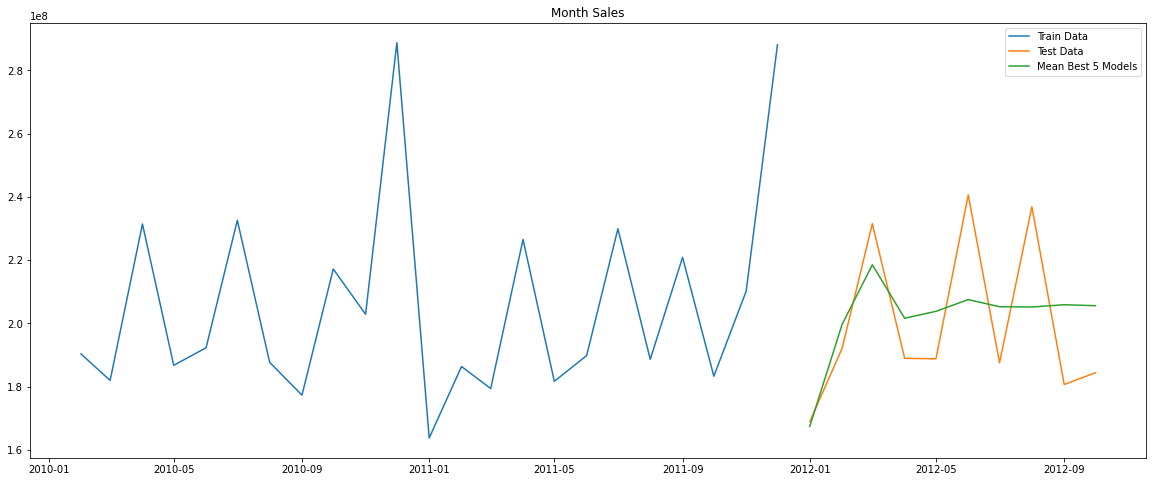

In [113]:
# Plot of Weekly_Sales with respect to years in train and test.
fig = plt.figure(figsize=(20,8))
plt.plot(train_data, label='Train Data')
plt.plot(test_data,label='Test Data')
plt.plot(precit_model['mean'], label='Mean Best 5 Models')
plt.title('Month Sales')
plt.legend()
plt.show()

In [ ]:
## Holt winter models

In [155]:
def search_grid_Holts_winter(df_data_train,df_test,conf):
    """This method perfomed a search grid over different paretemerts for Holt-Winter method.
    inputs:
        df_data_train(Pandas.DataFrame): data with index as date and columns 'neto_und_vendida'. 
        It is used for train the SES Model 
        df_test(Pandas.DataFrame): Pandas Data Frame with index as date and columns 'neto_und_vendida'. 
        It is used for compare vs the model created. 
        conf(list): list of 6 paremeters. Each element it used for configure a different model.  
            trend: String. 'add' or 'mul' to treat the Trend component of the time series. 
            damped: Boolean. To force converge while training the model. 
            seasonal: String. 'add' or 'mul' to treat the Seasonal component of the time series. 
            period: int. Number of months to considere a example. Normally 12. 
            boxcox: Boolean. To determine if use the boxcox or not to the time series.
            bias: Boolean. To determine if remove the bias from the time series 
    Ouputs: 
        return pandas dataframe within the paremeters used to created the model.  
    
    """
    lst_result = []
    test = df_test.copy()
    train = df_data_train.copy() 
    count = 0
    for cn in conf:
        try: 
            t,d,s,p,b,r = cn
            model = ExponentialSmoothing(df_data_train,trend=t, damped=d, seasonal=s, seasonal_periods=p)   
            #model_2 = ExponentialSmoothing(df_data_train,trend='add', damped=False, seasonal='add', seasonal_periods=12) 

            # Fit the model
            fit2 = model.fit(use_boxcox=b, remove_bias=r)

            y_truth = df_test
            print((test.shape))
            
            pred = fit2.forecast(len(test))
            print((pred.shape))
            rmse = np.sqrt(mean_squared_error(test.values,pred))
            

            temp_dic = {'smoothing_level':fit2.params['smoothing_level'],
                        #'smoothing_slope':fit2.params['smoothing_slope'],
                        'smoothing_seasonal':fit2.params['smoothing_seasonal'],
                       'AIC':np.round(fit2.aic,2),'RMSE':np.round(rmse,2),
                       'trend':t,'damped':d,'seasonal':s,'bias':r,'boxcox':b,'period':p}
            lst_result.append(temp_dic)
        except Exception as e:
            print(e.message)
            continue
    df_results = pd.DataFrame(lst_result)
    if len(df_results)==0:
        print('something went wrong')
        print('Zero models converged')
        return
    df_results.sort_values(by='RMSE',inplace=True)
    return df_results

In [153]:
def exp_smoothing_configs(seasonal=[11]):
    """
    This method create a list of list with parameters in order to compute a search grid for Holt-Winter 
    input: int seasonal parameter to consider the time aggregation of the data 
    outpu: list, list of parameters needed for Holt-Winter search grid 
        t: string-{additive,multiplicative}, way to treat the trend part of the time series. 
        d: boolean, if we perform or not difference to the time series 
        s: string-{additive,multiplicative}, way to treat the seasonal part of the time series. 
        p: int, period of time to considere one sample of the time series 
        b: boolean, if we perform or not boxcox to the time series 
        r: boolean, if we remove or not the bias to the time series 
    """
    models = list()
    # define config lists
    t_params = ['add', 'mul',None]
    d_params = [True, False]
    s_params = ['add','mul',None]
    p_params = seasonal
    b_params = [True, False]
    r_params = [True, False]
    # create config instances
    for t in t_params:
        for d in d_params:
            for s in s_params:
                for p in p_params:
                    for b in b_params:
                        for r in r_params:
                            cfg = [t,d,s,p,b,r]
                            models.append(cfg)
    return models

In [116]:
def train_HoltWinter_models(df_data_train,df_params,n=5):
    """Train and create the Holt-Winter models using the paremeters found in the searchgrid process
    
    Input: 
        train_df(pandas.DataFrame): data DataFrame within the sells with the initial format.
            (Data Used for the searchgrid process)
        df_params (pandas.DataFrame): data DataFrame within the paramertes for the models. 
            (Those were found in the searchgrid process)
        n(int): number of models to consider. This is used to extract the hyper parameters from 
        the DataFrame that holds it.
    Output:
        list: list with the models trained using the hyper parameter found in the search grid process  
    """
    lst_results=[]
    for i in range(n):
        temp_param = df_params.iloc[i,5:11]
        model = ExponentialSmoothing(df_data_train,trend=temp_param.values[0],
                                     damped=temp_param.values[1], seasonal=temp_param.values[2],
                                     seasonal_periods=temp_param.values[5])   
        # Fit the model
        fit2 = model.fit(optimized=True, use_boxcox=temp_param.values[4], remove_bias=temp_param.values[3])
        lst_results.append(fit2)
    return lst_results

In [117]:
def predict_HoltWinter_direct(df_data_train,df_test,lst_models,months=4):
    """Predict using the trained Holt-Winter model with the new data for N months

    Input:
        df_data_train(pandas.DataFrame): dataFrame within the data of training set
        df_test(pandas.DataFrame): dataFrame within the data of test set
        lst_models(list): list with Holt-Winter models trained
        months(int): number of months to forecast. (Default 4)
    Output: 
        tuple: pd.Dataframe within the forecasted values, pd.DataFrame within the comparison 
        metrics
    """
    temp_df = df_test.copy()
    # Compute direct prediction
    for idx,ele in enumerate(lst_models):
        if months!=4:
            pred = ele.forecast(months)
        else:
            pred = ele.forecast(len(df_test))
        
        # create a dictionary with all the HoltWinter Models
        dic_hat = {f'Forecast HW {idx}':pred}
        df_hat = pd.DataFrame(dic_hat)
        temp_df = pd.concat([temp_df, df_hat], axis=1, sort=False)
        
    temp_df['mean'] = temp_df.iloc[:,1:].mean(axis=1)
    temp_df['median'] = temp_df.iloc[:,1:].median(axis=1)
    
    df_comparison , df_metrics = compare_models_predicted(df_data_train,temp_df)
    
    return (df_comparison,df_metrics)

In [142]:
test_data.isna().any()

Weekly_Sales    False
dtype: bool

In [156]:
cnf = exp_smoothing_configs()
holtW_results = search_grid_Holts_winter(train_data, test_data, cnf)

/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:1116: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  FutureWarning
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: the 'dampe

(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:1116: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  FutureWarning
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: Convergen

(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)

/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:1116: FutureWarning: Setting use_boxcox during fit has been deprecated and wil


(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:1116: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  FutureWarning
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: Convergen

(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)


/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:1116: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  FutureWarning
/home/miguel/anaconda3/envs/specialization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: Convergen

(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)
(10, 1)
(10,)


AttributeError: 'ValueError' object has no attribute 'message'

In [139]:
holtW_results